# <font color = blue> Credit EDA Case Study </font>
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile, using the data sets given below.

The objective is to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


Data Sets

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [1]:
# Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filtering out the warnings
warnings.filterwarnings('ignore')

##  Task 1: Reading the data

- ### Subtask 1.1: Reading the loan application Data.

Read the loan application data file provided and store it in a dataframe `df_app_data`.

In [2]:
# reading the loan application data CSV file using pandas read_csv method.
df_app_data = pd.read_csv('application_data.csv')

# Set option to display all the rows and colums without limit
pd.set_option('display.max_columns', None, 'display.max_rows', None)
df_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [3]:
# Check the number of rows and columns in the dataframe
df_app_data.shape

(307511, 122)

In [4]:
# Check the column-wise null counts in the dataframe
df_app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [5]:
# Check the summary for the columns 
df_app_data.describe(include = 'all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

## Task 2: Cleaning the Data

Now that we have loaded the dataset and inspected it, we will do the data cleansing. 

- ###  Subtask 2.1: Drop unnecessary columns

Drop columns that are not required for our analysis.

In [6]:
# Creating copy of original data frame 
df1 = df_app_data

In [7]:
# Drop columns that are not required
df1.drop('NAME_TYPE_SUITE',axis=1,inplace=True)
df1.drop(df1.loc[:, 'FLAG_MOBIL':'FLAG_EMAIL'].columns,axis = 1,inplace=True)
df1.drop('HOUR_APPR_PROCESS_START',axis=1,inplace=True)
df1.drop(df1.loc[:, 'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns,axis = 1,inplace=True)
df1.drop(df1.loc[:, 'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns,axis = 1,inplace=True)
df1.drop(df1.loc[:, 'EXT_SOURCE_1':'EXT_SOURCE_3'].columns,axis = 1,inplace=True)

In [8]:
# Check the shape of the dataframe after dropping unnecessary columns
df1.shape

(307511, 44)

In [9]:
# Check the percentage of missing values
(df1.isnull().sum()* 100 / len(df1)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
REG_REGION_NOT_LIVE_REGION      0.00
R

In [10]:
# Droping column as the null values are more (65% of values are null)
df1.drop('OWN_CAR_AGE',axis=1,inplace=True)

- ###  Subtask 2.2: Check Data Redundancies 

In [11]:
# Check distinct values of each column of object type to see if any data redundancies/ identical rows.

In [12]:
df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [13]:
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [14]:
df1['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [15]:
df1['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [16]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [17]:
df1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [18]:
df1['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [19]:
df1['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [20]:
df1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- ###  Subtask 2.3: Fixing Invalid Values and Filter Data

In [22]:
# Convert XNA to missing value
df1.loc[df1.CODE_GENDER == 'XNA',['CODE_GENDER']] = np.nan
df1.loc[df1.ORGANIZATION_TYPE == 'XNA',['ORGANIZATION_TYPE']] = np.nan

In [23]:
# Convert all days columns to positive. As all days are mentioned with negative values, which is incorrect.
df1[['DAYS_BIRTH','DAYS_EMPLOYED',
   'DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = df1[['DAYS_BIRTH','DAYS_EMPLOYED',
                                               'DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].abs()

- ###  Subtask 2.4: Impute missing values

In [24]:
# Impute the missing values with 0.0. We can assume no enquiries were made for those missing values. 
df1[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
     'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']] = df1[['OBS_30_CNT_SOCIAL_CIRCLE',
                                                                    'DEF_30_CNT_SOCIAL_CIRCLE',
                                                                    'OBS_60_CNT_SOCIAL_CIRCLE',
                                                                    'DEF_60_CNT_SOCIAL_CIRCLE']].fillna(value=0.0)

In [25]:
# Impute the missing values with 0.0. We can assume no enquiries were made for those missing values. 

df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = df1[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

In [26]:
# Impute missing values with mode value for "Occupation Type"

mode_OccupationType  = df1.OCCUPATION_TYPE.mode()
df1["OCCUPATION_TYPE"].fillna(mode_OccupationType[0], inplace=True)

In [27]:
# Impute missing values with mode value for "CODE_GENDER" & "ORGANIZATION_TYPE"

df1["CODE_GENDER"].fillna(df1.CODE_GENDER.mode()[0], inplace=True)
df1["ORGANIZATION_TYPE"].fillna(df1.ORGANIZATION_TYPE.mode()[0], inplace=True)

In [28]:
# Impute missing values with median value for "AMT_ANNUITY" & "AMT_GOODS_PRICE"

df1["AMT_ANNUITY"].fillna(df1["AMT_ANNUITY"].median(), inplace=True)
df1["AMT_GOODS_PRICE"].fillna(df1["AMT_GOODS_PRICE"].median(), inplace=True)

In [29]:
# Again check the percentage of missing values
df1.isnull().sum().sort_values(ascending = False)

CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
AMT_GOODS_PRICE                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
NAME_HOUSING_TYPE              0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
AMT_ANNUITY                    0
OCCUPATION_TYPE                0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_CONTRACT_TYPE             0
TARGET                         0
DAYS_ID_PUBLISH                0
AMT_REQ_CREDIT_BUREAU_YEAR     0
AMT_REQ_CREDIT_BUREAU_QRT      0
REGION_RATING_CLIENT           0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
DEF_60_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT

### Observations:
1. We can observe few outliers.
2. The outliers range is very far from the IQR .

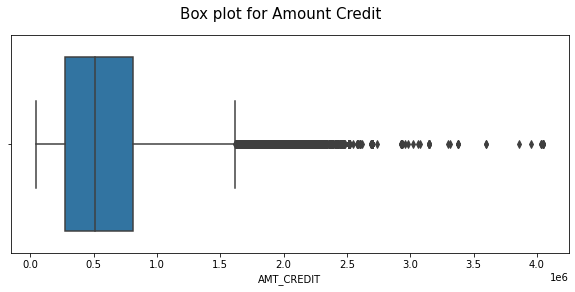

In [30]:
# Outliers in AMT_CREDIT column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_CREDIT)
plt.suptitle('Box plot for Amount Credit',fontsize=15)

plt.show()

In [31]:
df1['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [32]:
# Upper Limit
Q1= df1['AMT_CREDIT'].quantile(0.25)
Q3= df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_CREDIT']< UpperLimit]
df1['AMT_CREDIT'].describe()

count    3.009490e+05
mean     5.699786e+05
std      3.527292e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.056650e+05
75%      7.908300e+05
max      1.616278e+06
Name: AMT_CREDIT, dtype: float64

### Observations:
We can observe few outliers.

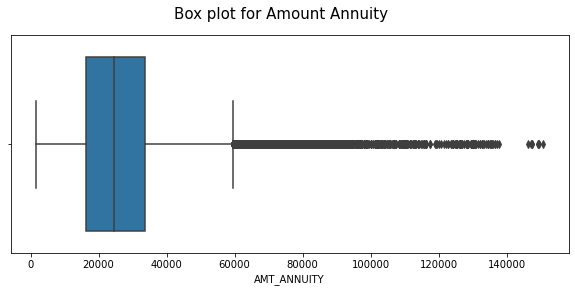

In [33]:
# Outliers in AMT_ANNUITY column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_ANNUITY)
plt.suptitle('Box plot for Amount Annuity',fontsize=15)
plt.show()

In [34]:
df1['AMT_ANNUITY'].describe()

count    300949.000000
mean      26365.417132
std       13432.852957
min        1615.500000
25%       16371.000000
50%       24561.000000
75%       33606.000000
max      150759.000000
Name: AMT_ANNUITY, dtype: float64

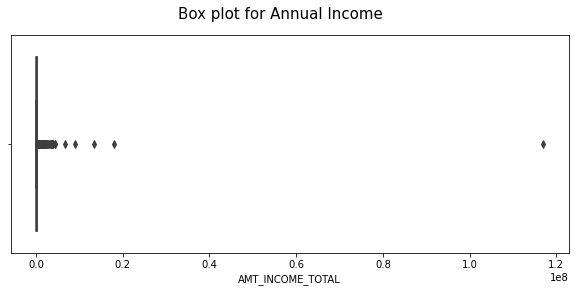

In [35]:
# Outliers in AMT_INCOME_TOTAL column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.suptitle('Box plot for Annual Income',fontsize=15)
plt.show()

In [36]:
df1['AMT_INCOME_TOTAL'].describe()

count    3.009490e+05
mean     1.658933e+05
std      2.373126e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
# Upper Limit
Q1= df1['AMT_INCOME_TOTAL'].quantile(0.25)
Q3= df1['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_INCOME_TOTAL']< UpperLimit]

### Observations:
1. We can observe few outliers.
2. For **AMT_INCOME_TOTAL** column it can be seen that the IQR is itself not visible and a value is way higher.
What we see in here are only the whisker values


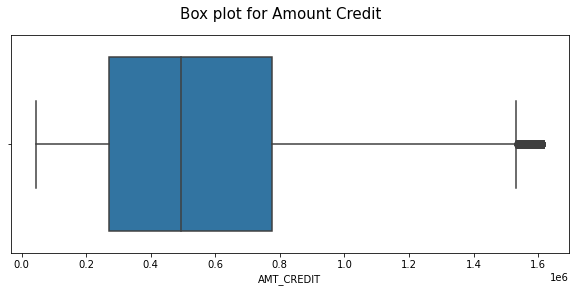

In [38]:
# Outliers in AMT_CREDIT column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_CREDIT)
plt.suptitle('Box plot for Amount Credit',fontsize=15)

plt.show()

In [39]:
df1['AMT_CREDIT'].describe()

count    2.870920e+05
mean     5.566986e+05
std      3.463855e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.950000e+05
75%      7.743409e+05
max      1.616278e+06
Name: AMT_CREDIT, dtype: float64

In [40]:
# Upper Limit
Q1= df1['AMT_CREDIT'].quantile(0.25)
Q3= df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_CREDIT']< UpperLimit]
df1['AMT_CREDIT'].describe()

count    2.844850e+05
mean     5.475087e+05
std      3.343333e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.904955e+05
75%      7.602255e+05
max      1.530558e+06
Name: AMT_CREDIT, dtype: float64

### Observations:
- We can observe few outliers.
- Also for' **AMT_CREDIT** can be seen that Upper Fence has lot many values which determines it has outliers

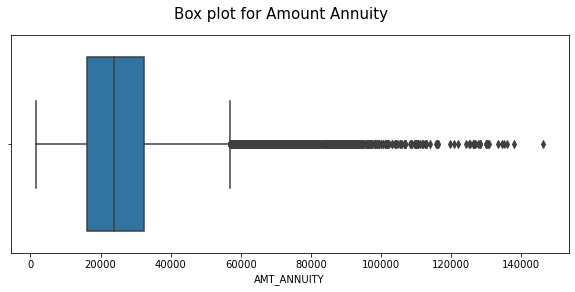

In [41]:
# Outliers in AMT_ANNUITY column
plt.figure(figsize=(10,4))
sns.boxplot(df1.AMT_ANNUITY)
plt.suptitle('Box plot for Amount Annuity',fontsize=15)
plt.show()

In [42]:
df1['AMT_ANNUITY'].describe()

count    284485.000000
mean      25471.398965
std       12614.477233
min        1615.500000
25%       16047.000000
50%       23931.000000
75%       32373.000000
max      146250.000000
Name: AMT_ANNUITY, dtype: float64

In [43]:
# Upper Limit
Q1= df1['AMT_ANNUITY'].quantile(0.25)
Q3= df1['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
UpperLimit = Q3+1.5*IQR
df1 = df1[df1['AMT_ANNUITY']< UpperLimit]
df1['AMT_ANNUITY'].describe()

count    279362.000000
mean      24706.506014
std       11275.468711
min        1615.500000
25%       15957.000000
50%       23755.500000
75%       31743.000000
max       56857.500000
Name: AMT_ANNUITY, dtype: float64

### Observations:
- We can observe more outliers in Amount Annuity.
- Also for' **AMT_ANNUITY** can be seen that Upper Fence has lot many values which determines it has outliers

## Task 3: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

In [44]:
# Calculating Age of Applicants, by creating a new column "Age"

df1["Age"] = (df1["DAYS_BIRTH"] / 365).astype(int)

- ###  Subtask 3.1: Visualization of data distributions

In [45]:
# generic method to plot distributions for application data

def checkDistributionsFor(param):
    plt.figure(figsize=(14, 10))
    plt.title('Distribution of Applicants in terms of their ' + param, fontsize=18)
    sortedData = df1[param].value_counts().sort_values()
    sortedData.plot(kind='barh')
    plt.show()
    

##### <font color = brown> 3.1.1 Distribution of Applicants in terms of their Occuption - Type</font>

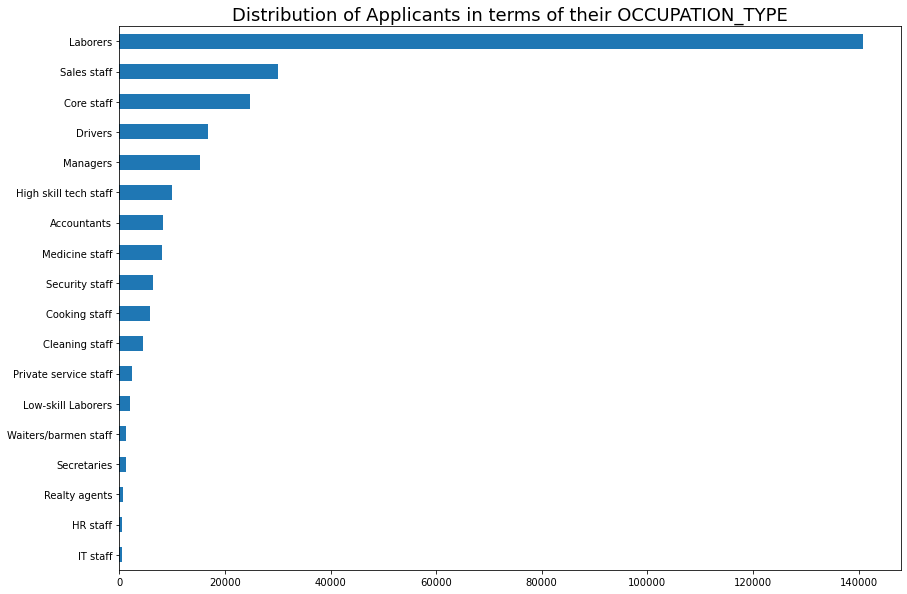

In [46]:
checkDistributionsFor('OCCUPATION_TYPE')

##### <font color = brown> 3.1.2 Distribution of DAYS when Applicant had started Previous Application</font>

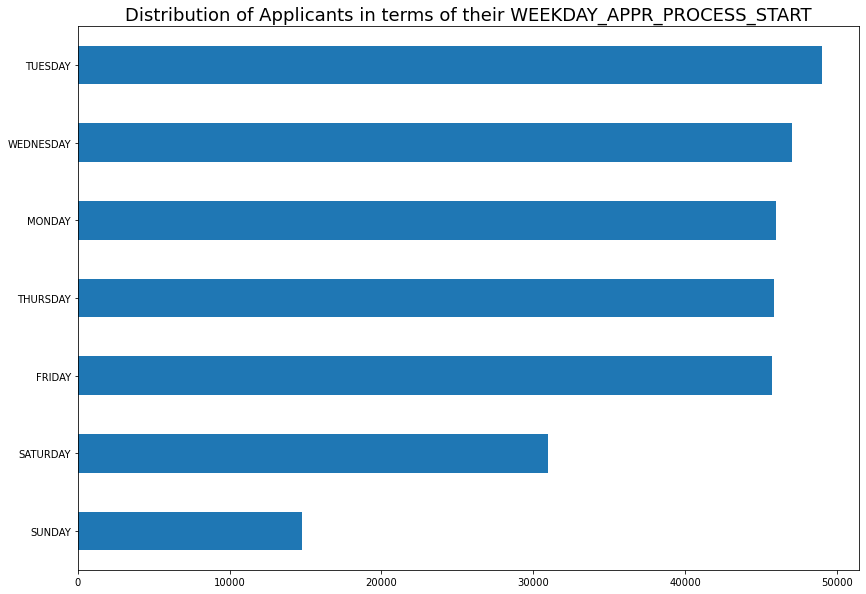

In [47]:
checkDistributionsFor('WEEKDAY_APPR_PROCESS_START')

##### <font color = brown> 3.1.3 Distribution of Applicants Organization Type</font>

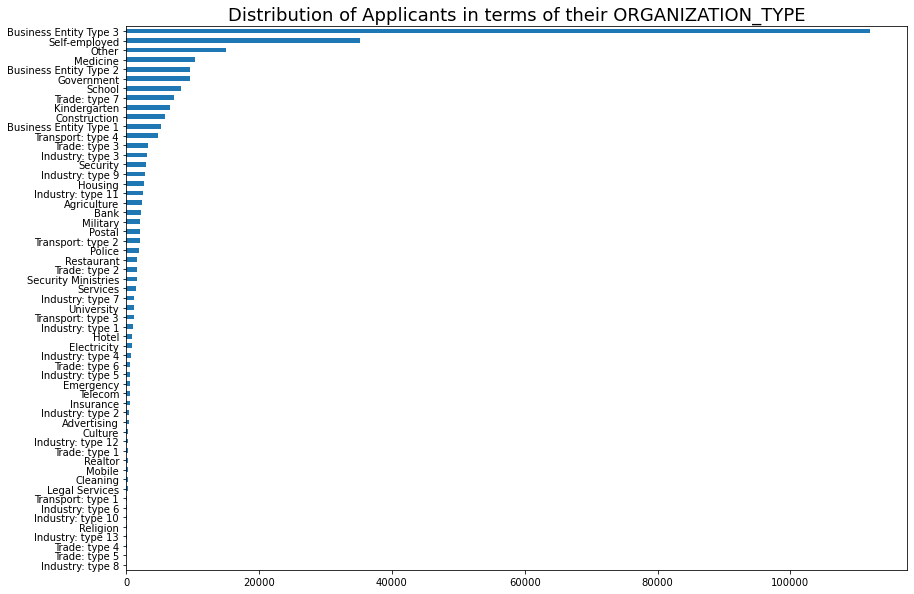

In [48]:
checkDistributionsFor('ORGANIZATION_TYPE')

##### <font color = brown> 3.1.4 Distribution of Applicants INCOME TYPE </font>

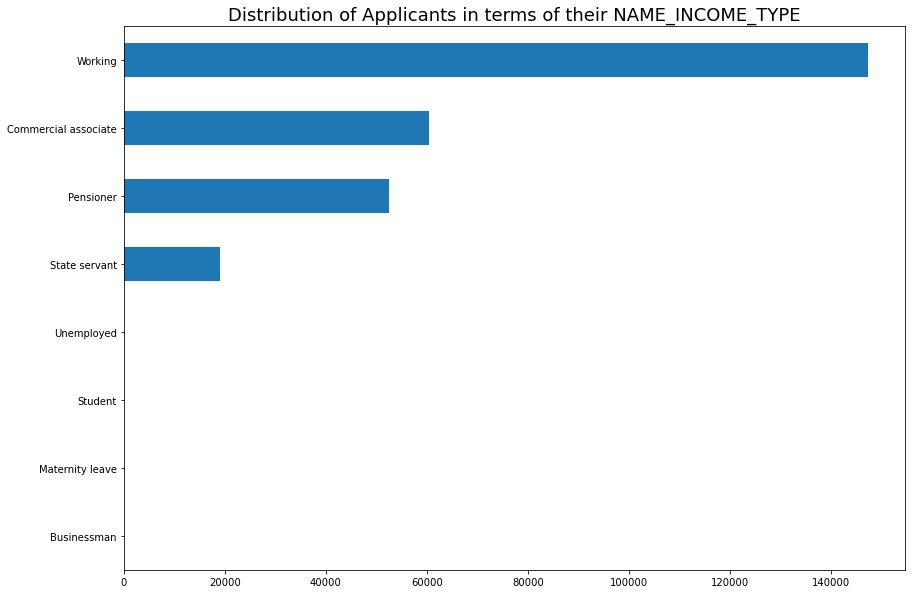

In [49]:
checkDistributionsFor('NAME_INCOME_TYPE')

##### <font color = brown> 3.1.5 Distribution of Applicants Family Status </font>

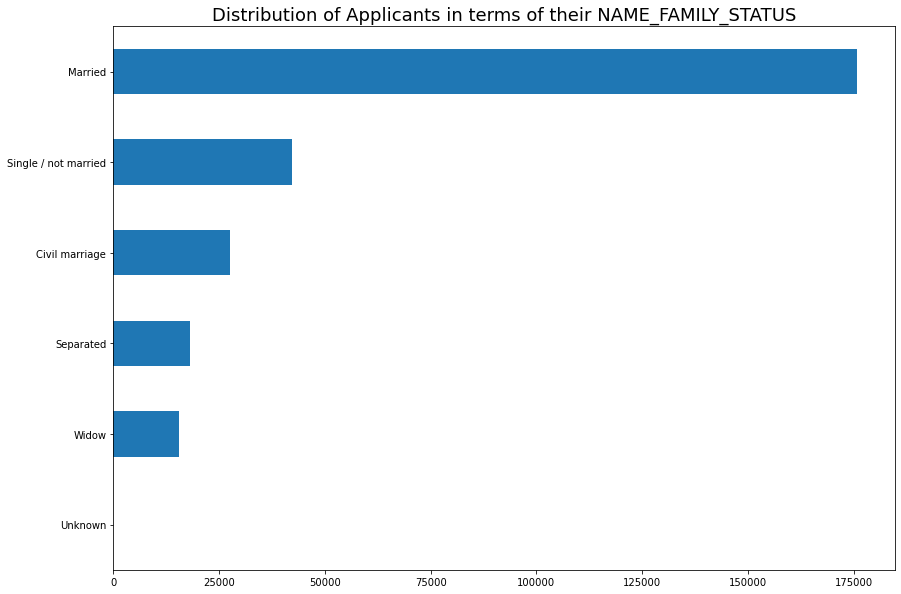

In [50]:
checkDistributionsFor('NAME_FAMILY_STATUS')

##### <font color = brown>3.1.6 Distribution of Applicants Housing Situation </font>

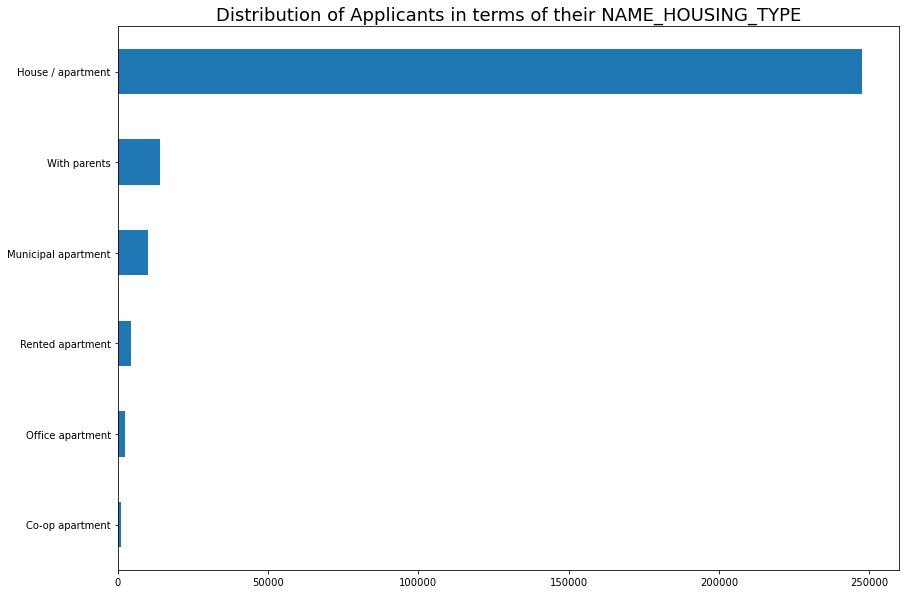

In [51]:
checkDistributionsFor('NAME_HOUSING_TYPE')

##### <font color = brown> 3.1.7 Distribution of Applicants Contract product type </font>

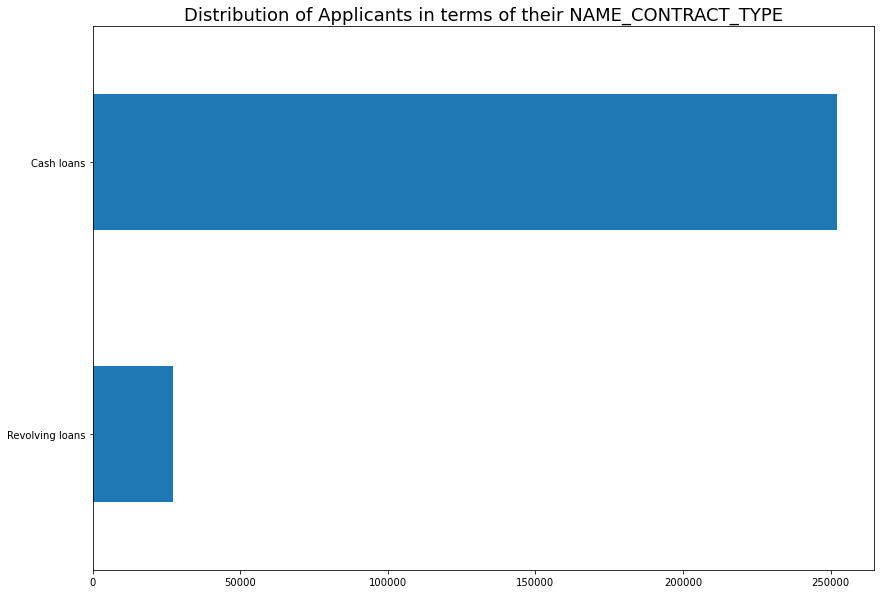

In [52]:
checkDistributionsFor('NAME_CONTRACT_TYPE')

##### <font color = brown> 3.1.8 Distribution of Applicants Gender </font>

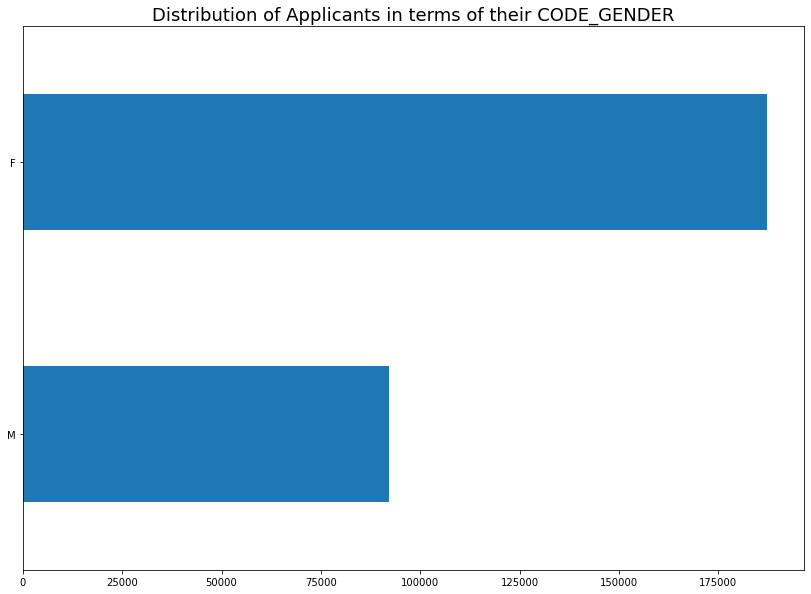

In [53]:
checkDistributionsFor('CODE_GENDER')

###  Subtask 3.2: Binning of continuous variables


In [54]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  279362.000000  279362.000000  279362.000000     279362.000000   
mean   278180.795158       0.083215       0.413474     150280.569359   
std    102814.442581       0.276207       0.719996      61179.574046   
min    100002.000000       0.000000       0.000000      25650.000000   
25%    189069.250000       0.000000       0.000000     112500.000000   
50%    278211.000000       0.000000       0.000000     135000.000000   
75%    367050.750000       0.000000       1.000000     180000.000000   
max    456255.000000       1.000000      19.000000     337050.000000   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.793620e+05  279362.000000     2.793620e+05   
mean   5.392952e+05   24706.506014     4.821527e+05   
std    3.296665e+05   11275.468711     2.982073e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.695500e+05   15957.000000     2.250000e+05   
50%    4.776210e+05   23755.500000     4.500000e+05   
75%    7.551900e+05   31743.000000     6.750000e+05   
max    1.530558e+06   56857.500000     1.530000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               279362.000000  279362.000000  279362.000000   
mean                     0.020220   16045.829186   70547.350223   
std                      0.012857    4419.907154  141775.332688   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12341.000000     923.000000   
50%                      0.018850   15753.000000    2212.000000   
75%                      0.026392   19764.000000    6002.000000   
max                      0.072508   25201.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      279362.000000    279362.000000    279361.000000   
mean         5025.711929      2995.859326         2.141777   
std          3532.225770      1507.176612         0.911921   
min             0.000000         0.000000         1.000000   
25%          2059.000000      1722.000000         2.000000   
50%          4537.000000      3258.000000         2.000000   
75%          7533.000000      4298.000000         3.000000   
max         24672.000000      7197.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         279362.000000                279362.000000   
mean               2.076410                     2.056826   
std                0.491497                     0.485473   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               279362.000000               279362.000000   
mean                     0.013241                    0.044383   
std                      0.114305                    0.205946   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                279362.000000           279362.000000   
mean                      0.035245                0.078597   
std                       0.184398                0.269109   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_

In [55]:
# Binning the AMT_INCOME_TOTAL column into low, medium, high, very high values for both the dataframes.
df1.loc[:,'INCOME_RANGE'] = pd.qcut(df1.loc[:,'AMT_INCOME_TOTAL'], q=4,labels=['Low','Medium','High','Very High'])
print(df1['INCOME_RANGE'].value_counts())

Low          100038
Very High     67965
High          63367
Medium        47992
Name: INCOME_RANGE, dtype: int64


In [56]:
# Binning the AMT_ANNUITY column into low, medium, high, very high values.
df1.loc[:,'ANNUITY_RANGE'] = pd.qcut(df1.loc[:,'AMT_ANNUITY'], q=4,labels=['Low','Medium','High','Very High'])
print(df1['ANNUITY_RANGE'].value_counts())

Low          69867
Medium       69835
High         69831
Very High    69829
Name: ANNUITY_RANGE, dtype: int64


In [57]:
# Binning the AMT_INCOME_TOTAL column into low, medium, high, very high values.
df1.loc[:,'CREDIT_RANGE'] = pd.qcut(df1.loc[:,'AMT_CREDIT'], q=4,labels=['Low','Medium','High','Very High'])
print(df1['CREDIT_RANGE'].value_counts())

High         71406
Low          70189
Medium       69505
Very High    68262
Name: CREDIT_RANGE, dtype: int64


In [58]:
df1['Age_Group'] = pd.cut(df1.Age, bins=[0,19,39,59,100], 
                                  labels=["Teen", "Young Adults", "Old Adults","Senior Citizens"])
print(df1['Age_Group'].value_counts())

Old Adults         129535
Young Adults       116152
Senior Citizens     33675
Teen                    0
Name: Age_Group, dtype: int64


#### We will divide the application dataset into two different dataframes based on target variable's value.

In [59]:
df1_t0 =df1[df1.TARGET==0]
df1_t1=df1[df1.TARGET==1]

- ###  Subtask 3.3: Imbalance in Dataframe

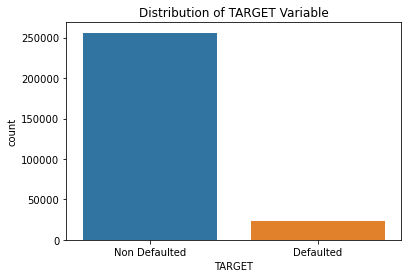

Imbalance :  11.02


In [60]:
#checking the distribution of target variable
imbalance = round(len(df1_t0)/len(df1_t1),2)
c = sns.countplot(df1["TARGET"])
c.set_xticklabels(['Non Defaulted','Defaulted'])
plt.title("Distribution of TARGET Variable")
plt.show()
print("Imbalance : ",imbalance)

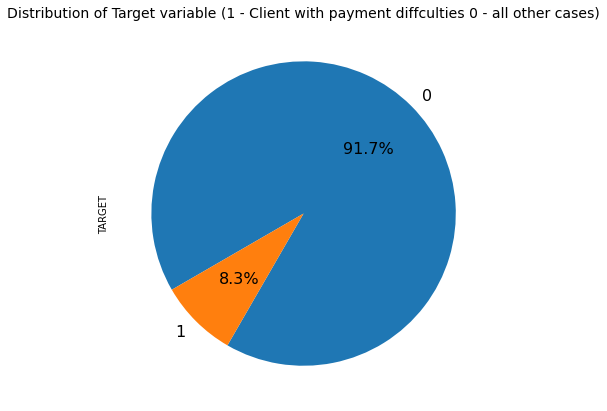

In [61]:
###### Target Distribution

plt.figure(figsize=(12, 7))
plt.title("Distribution of Target variable (1 - Client with payment diffculties 0 - all other cases)", fontsize=14);

targetVal = df1["TARGET"].value_counts()

targetVal.plot(kind='pie', autopct='%1.1f%%', startangle=240, fontsize=16)
plt.show()

### Observation :

- As can be seen distribution of data **people having diffculty with repayment on loan is compartively less than people who dont have any diifuclties**.
- Precisely **92%** people do not face any diffcultiies while **8%** faces payment diffculties

- ###  Subtask 3.4: Univariate Analysis with respect to TAGET 0(Non - Defaulter)  and TARGET 1(Defaulter)

In [62]:
# Define a function for plotting univariate graphs
def plotUnivariate(column):
    plt.figure(figsize=(15,7))
    plt.subplot(1, 2, 1)       
    sns.countplot(column, data=df1_t0)
    plt.title('Customers without payment difficulties', fontsize=14)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Count of non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(column, data=df1_t1)
    plt.title('Customers with payment difficulties', fontsize=14)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Count of defaulters')
    plt.show()

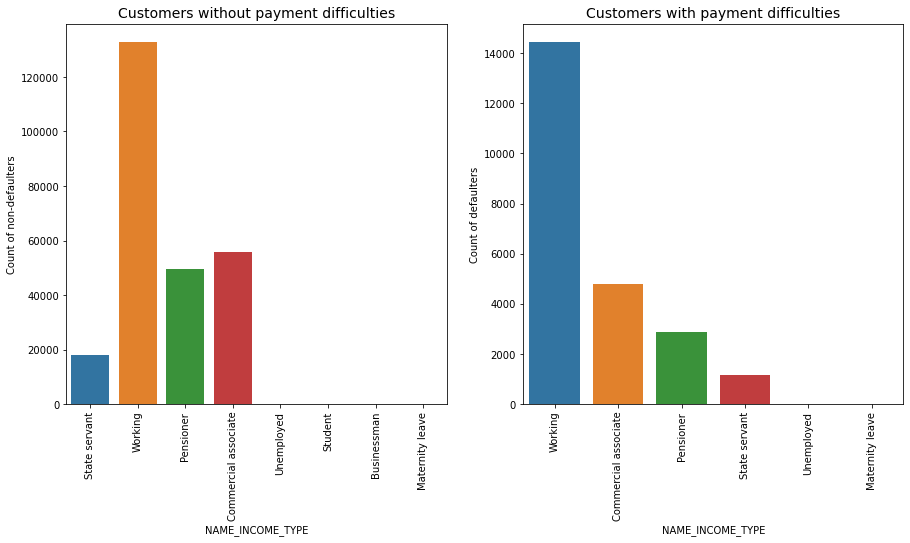

In [63]:
# Plot bar graph for NAME_INCOME_TYPE column
plotUnivariate('NAME_INCOME_TYPE')

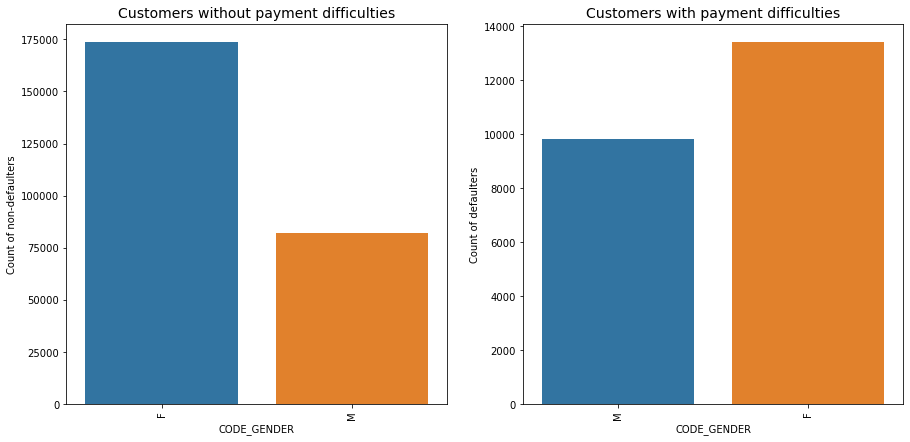

In [64]:
plotUnivariate('CODE_GENDER')

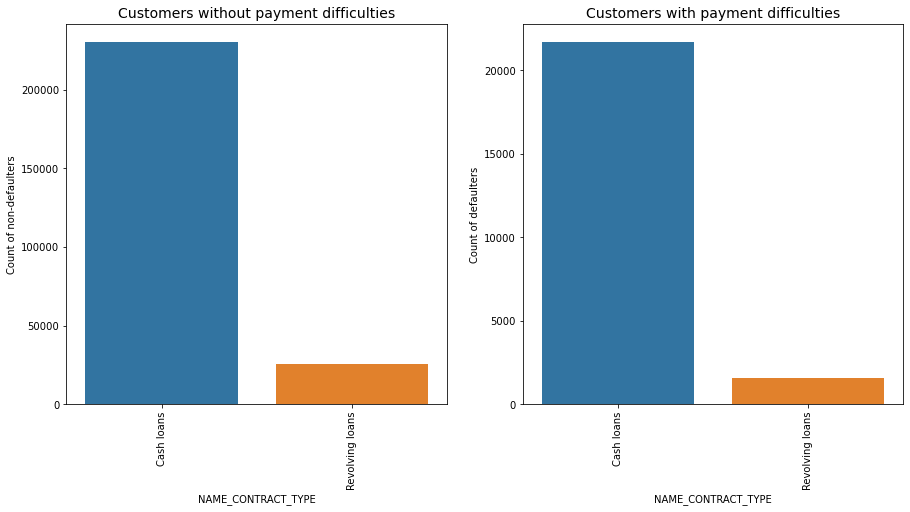

In [65]:
plotUnivariate('NAME_CONTRACT_TYPE')

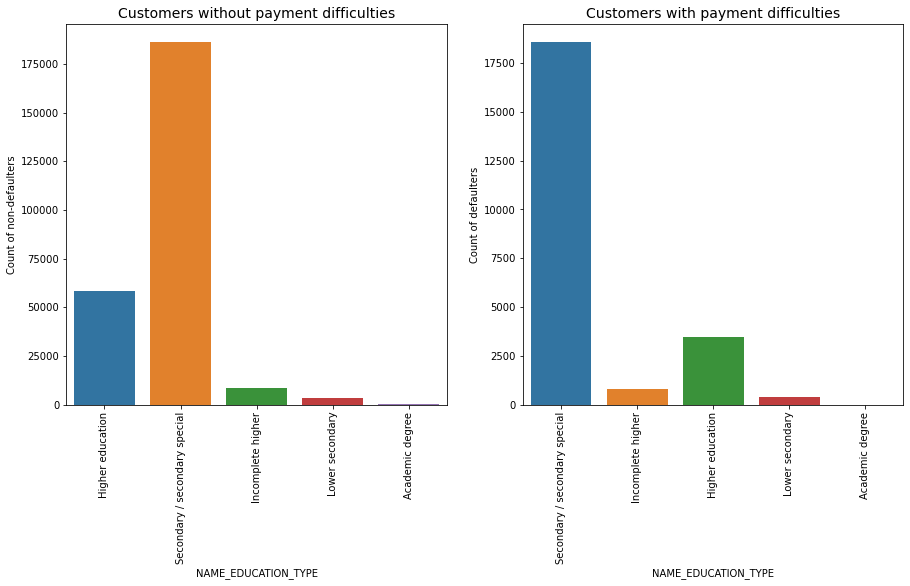

In [66]:
plotUnivariate('NAME_EDUCATION_TYPE')

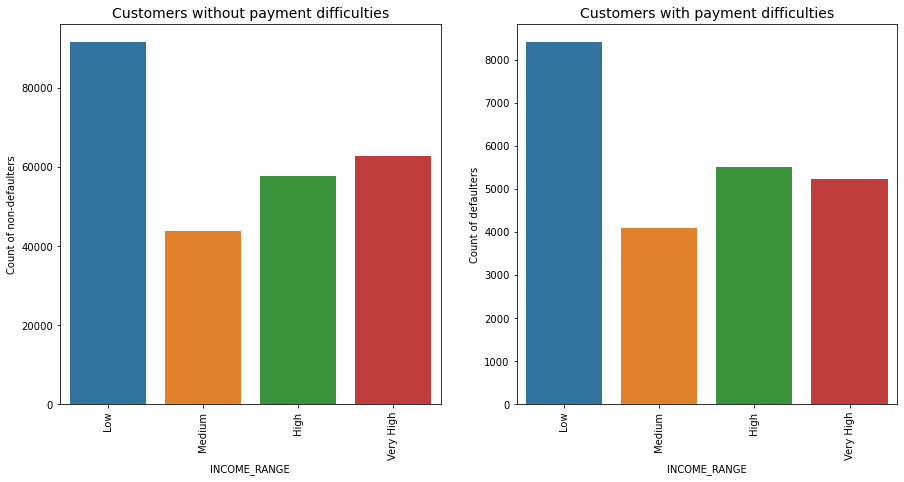

In [67]:
plotUnivariate('INCOME_RANGE')

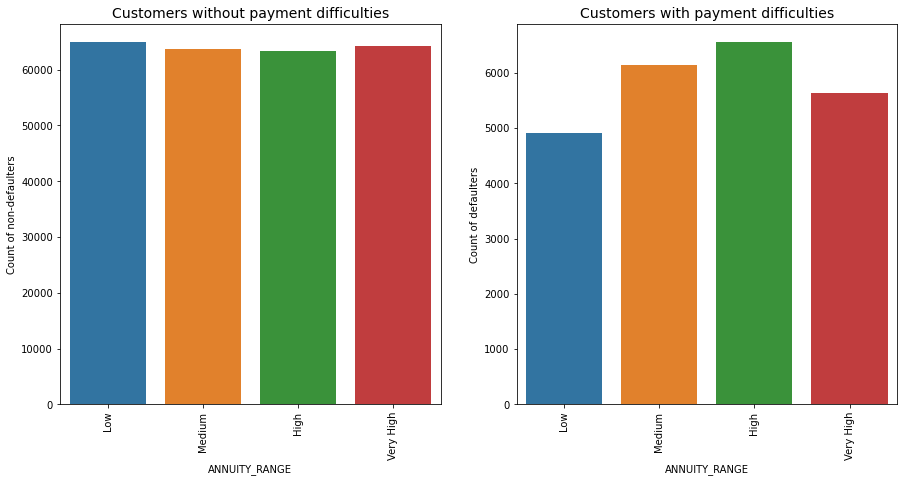

In [68]:
plotUnivariate('ANNUITY_RANGE')

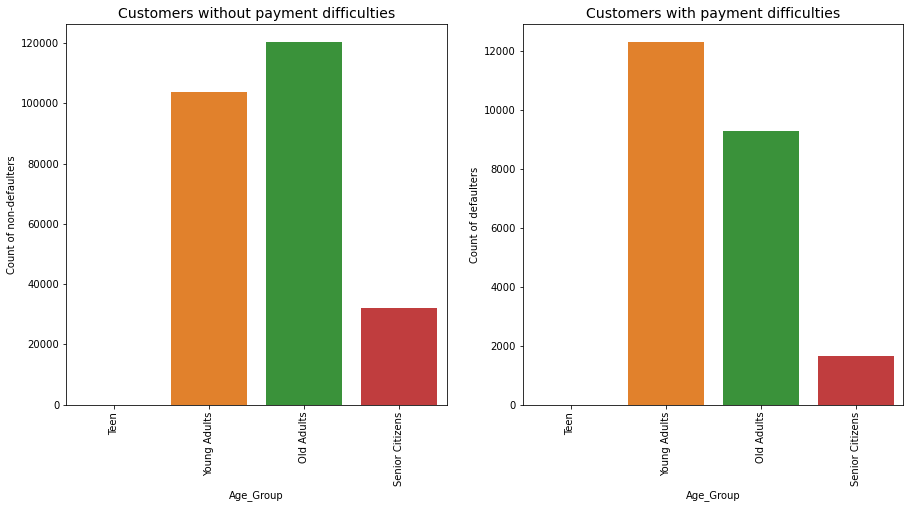

In [69]:
plotUnivariate('Age_Group')

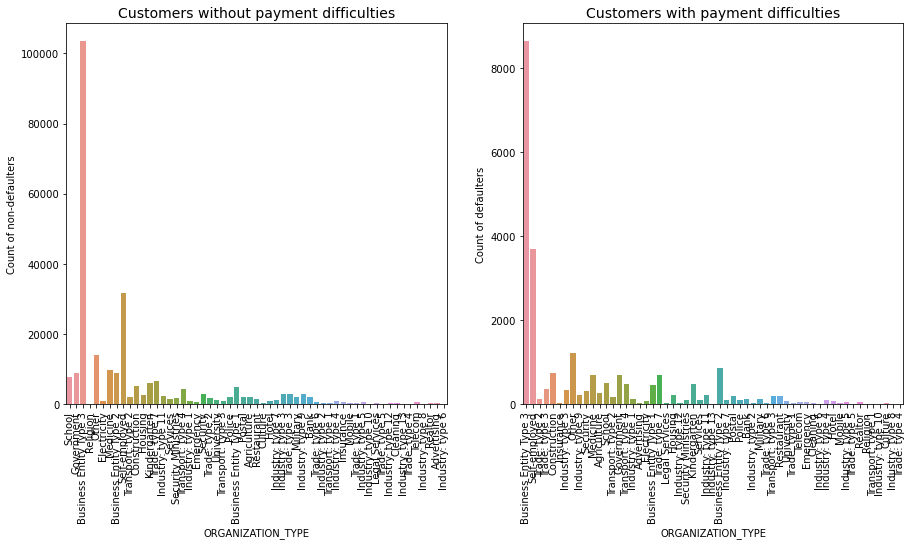

In [70]:
plotUnivariate('ORGANIZATION_TYPE')

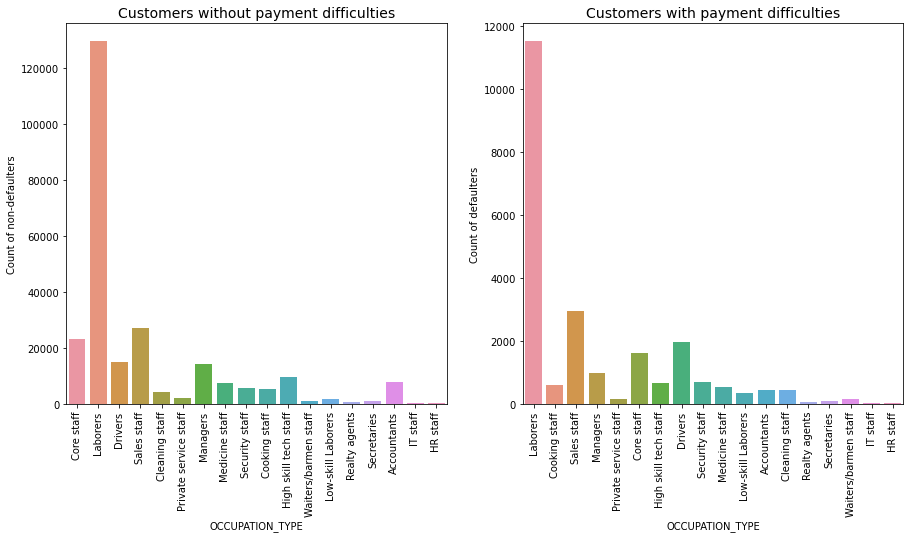

In [71]:
plotUnivariate('OCCUPATION_TYPE')

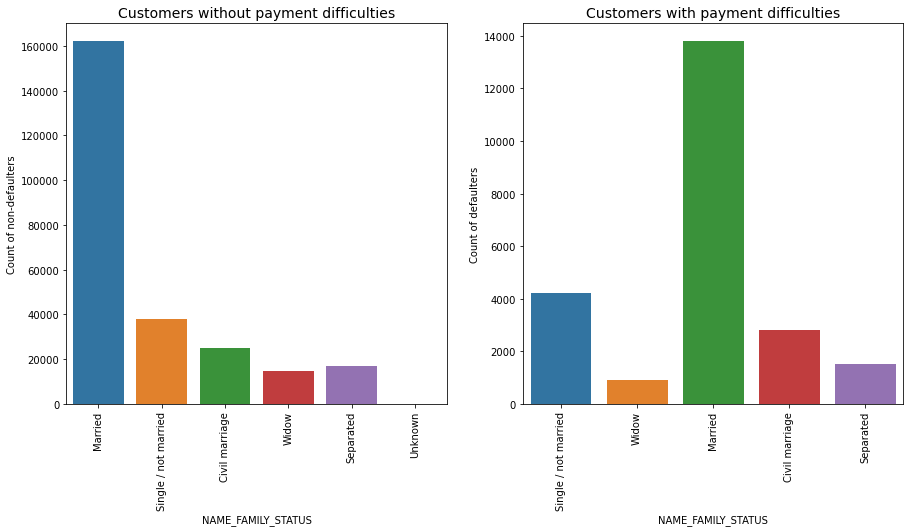

In [72]:
plotUnivariate('NAME_FAMILY_STATUS')

### Observations:

1. People having high annuity amount are the most in defaulters.
2. People having medium annuity amount are the most in non-defaulters.
3. People having FAMILY_STATUS as Married have relatively lesser probability of being a Defaulter as compared to others.
4. MALES have relatively higher probability being a Defaulter comapared to Females
5. Bussinessman & Students never fall in the category of being a Defaulter.
6. Young Adults or people in the age group between 20 and 39 have relatively higer probability of being a Defaulter than other age groups.
7. Self Employed people have relatively higer probability of being a defaulter.

- ###  Segmented Univariate Analysis

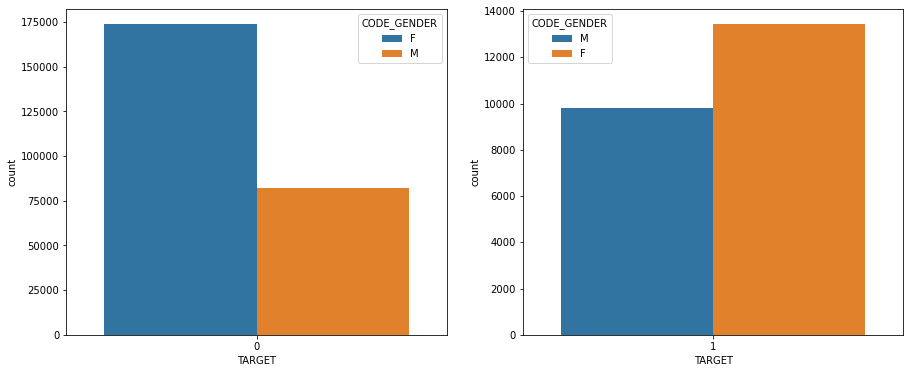

In [73]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df1_t0)
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df1_t1)
plt.show()

### Observations:

1. There are more Female Non-Defaulters and Defaulters , Hence the population Female Clients are relatively larger than Male Clients.
2. There are less Male Non-Defaulters and Defaulters , Hence the population Male Clients are relatively smaller than FeMale Clients.


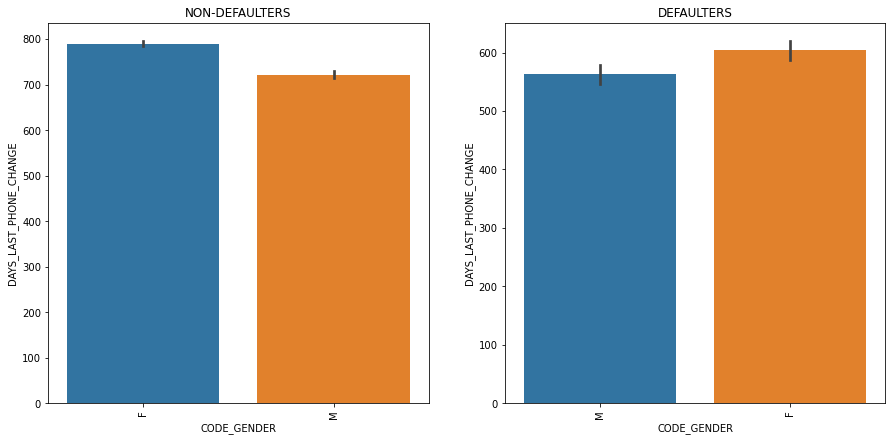

In [74]:
def plotGender(x, y):
    plt.figure(figsize=(15, 7))
    # subplot 1: statistic=mean
    plt.subplot(1, 2, 1)
    plt.xticks(rotation=90)
    sns.barplot(x=x, y=y, data=df1_t0, estimator =np.median)
    plt.title("NON-DEFAULTERS")
    # subplot 2: statistic=median
    plt.subplot(1, 2, 2)
    plt.xticks(rotation=90)
    sns.barplot(x=x, y=y, data=df1_t1, estimator =np.median)
    plt.title("DEFAULTERS")
    plt.show()
    
plotGender('CODE_GENDER', 'DAYS_LAST_PHONE_CHANGE')

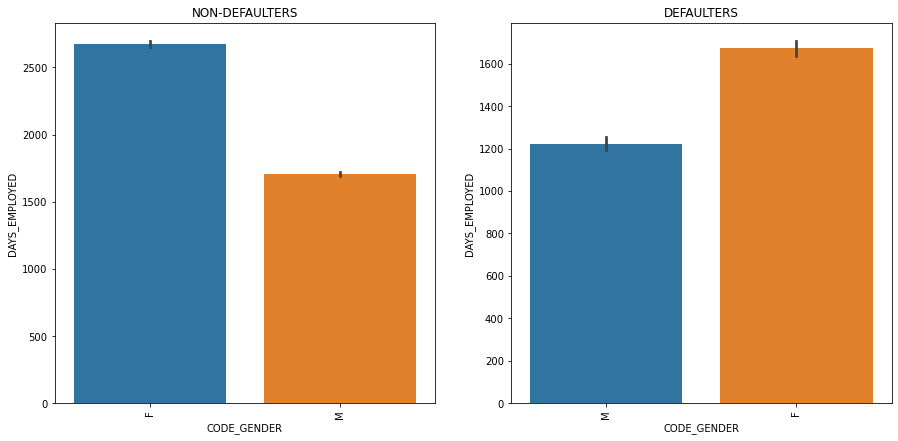

In [75]:
plotGender('CODE_GENDER', 'DAYS_EMPLOYED')

### Observations

- Males who are defaulter have a higher tendency to change their phones compared to that of females.
- Males with end up being a defaulter also have been a trend of job change recently comapred to that of females.

- ###  Subtask 3.5: Bivariate Analysis

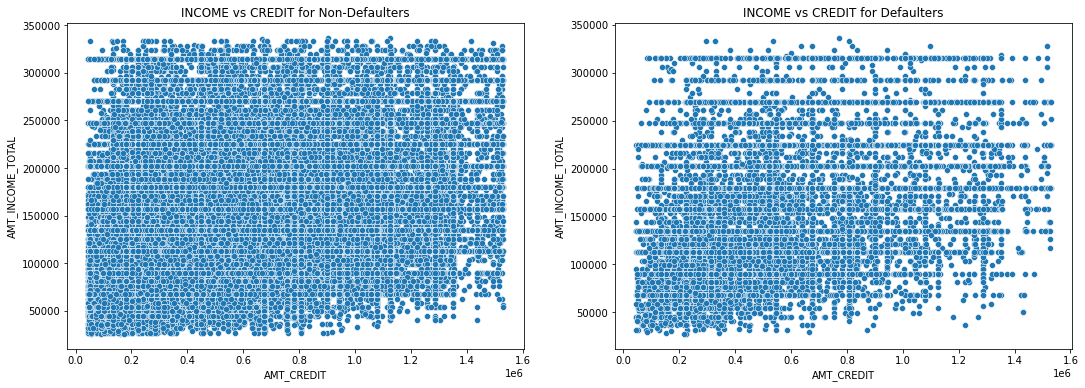

In [76]:
# Plot scatter plot for AMT_CREDIT vs AMT_INCOME_TOTAL for both the TARGET values
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=df1_t0)
plt.title('INCOME vs CREDIT for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=df1_t1)
plt.title('INCOME vs CREDIT for Defaulters')
plt.show()

### Observations:
Lower density is found among the defaulters where income is greater than 230k

Lesser the Income more number of Defaulters.

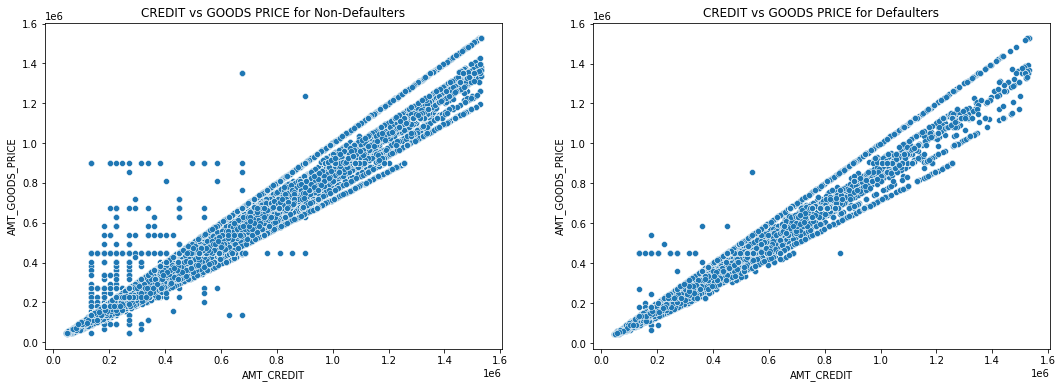

In [77]:
# Plot scatter plot for AMT_CREDIT vs AMT_GOODS_PRICE for both the TARGET values
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=df1_t0)
plt.title('CREDIT vs GOODS PRICE for Non-Defaulters')

plt.subplot(122)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=df1_t1)
plt.title('CREDIT vs GOODS PRICE for Defaulters')
plt.show()

### Observations:

There is a positive corelation between Credit Amount of Loan and Goods Price as we can see when one of the value increases the other also increases.

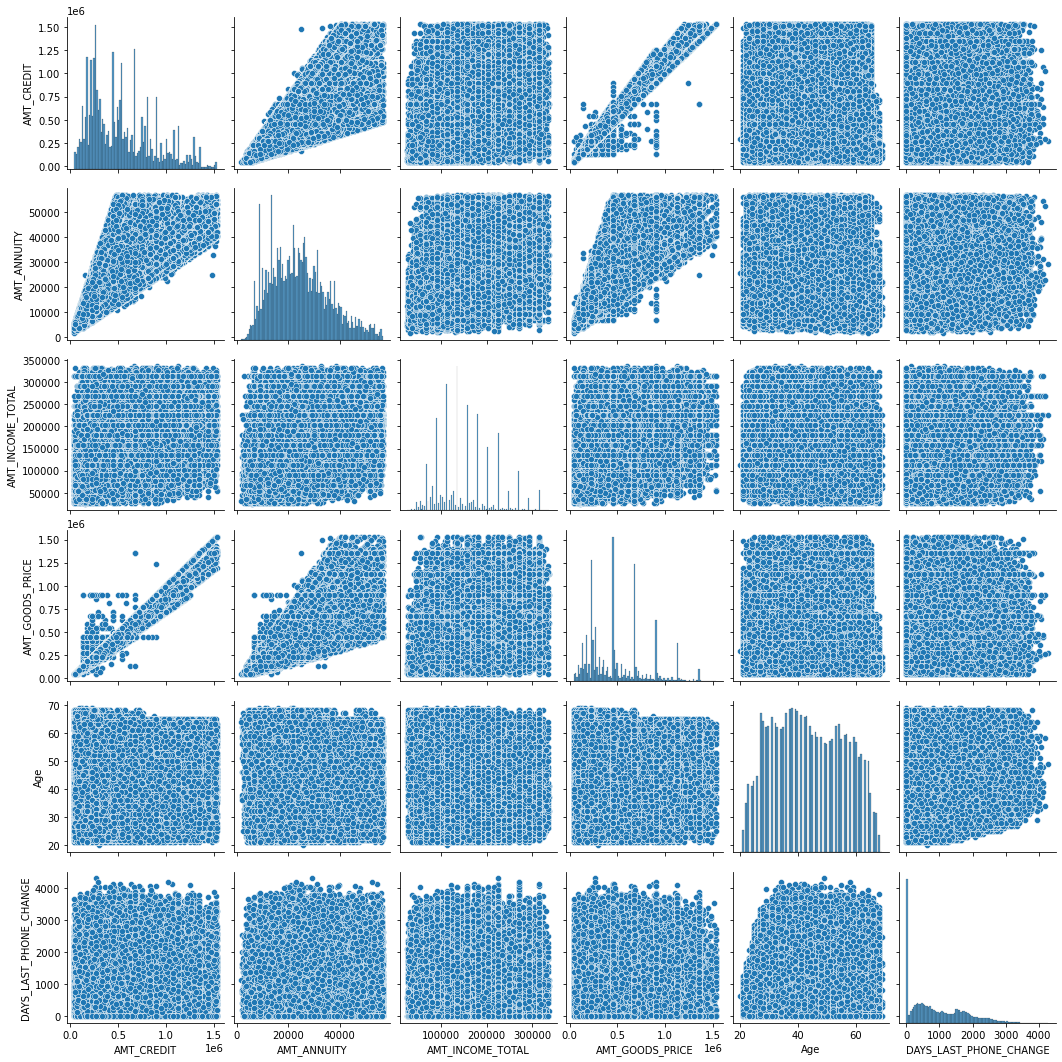

In [78]:
# plotting pair plots for NON-DEFAULTERS paramters

pair = df1_t0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'Age', 'DAYS_LAST_PHONE_CHANGE']]
sns.pairplot(pair)

plt.show()

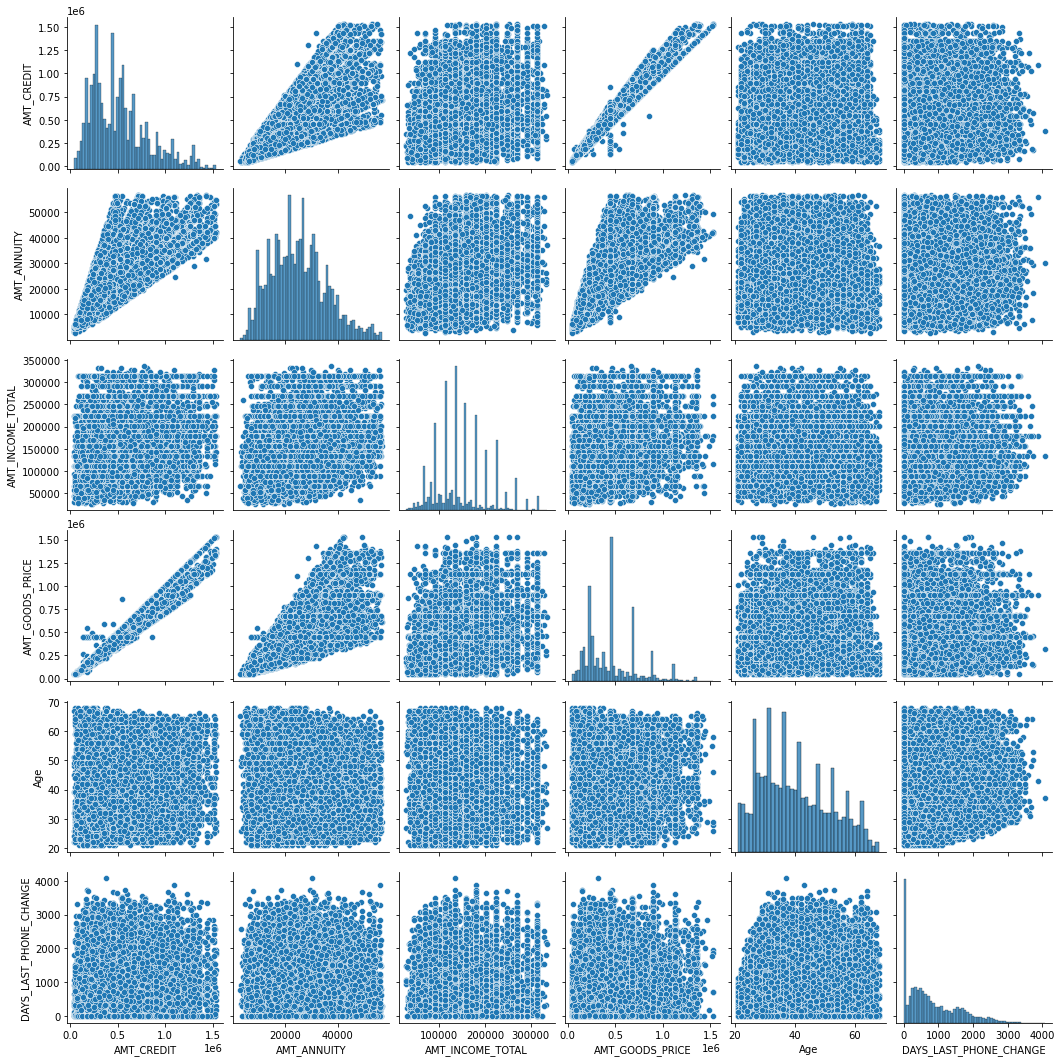

In [79]:
# plotting pair plots for DEFAULTERS
pair = df1_t1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'Age', 'DAYS_LAST_PHONE_CHANGE']]
sns.pairplot(pair)

plt.show()

In [80]:
# finding correlation in NON-DEFAULTERS dataset

corr_nonDefaulter = df1_t0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','Age',
         'AMT_CREDIT','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE',
              'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']].corr(method = 'pearson')

unstacked_nonDefaulter = corr_nonDefaulter.unstack().drop_duplicates()

u_nD = unstacked_nonDefaulter.sort_values(kind="quicksort", ascending = False).head(50)

In [81]:
# printing top 10 correlation in non-Defaulter dataset
u_nD.iloc[1:11]

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998516
AMT_GOODS_PRICE             AMT_CREDIT                     0.982693
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950646
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.876632
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861924
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.861115
AMT_ANNUITY                 AMT_CREDIT                     0.770923
AMT_GOODS_PRICE             AMT_ANNUITY                    0.767988
DAYS_EMPLOYED               Age                            0.637557
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.452364
dtype: float64

In [82]:
# finding correlation in DEFAULTERS dataset

corr_Defaulter = df1_t1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','Age',
         'AMT_CREDIT','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE',
              'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY']].corr(method = 'pearson')


unstacked_Defaulter = corr_Defaulter.unstack().drop_duplicates()

u_D = unstacked_Defaulter.sort_values(kind="quicksort", ascending = False).head(50)

In [83]:
# printing top 10 correlation in Defaulter dataset
u_D.iloc[1:11]

OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998214
AMT_GOODS_PRICE             AMT_CREDIT                     0.978279
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.960654
CNT_FAM_MEMBERS             CNT_CHILDREN                   0.884717
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.868852
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.849841
AMT_ANNUITY                 AMT_CREDIT                     0.747662
AMT_GOODS_PRICE             AMT_ANNUITY                    0.742706
DAYS_EMPLOYED               Age                            0.591731
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.494331
dtype: float64

In [84]:
# finding top 10 inverse correlation
u_ID = unstacked_Defaulter.sort_values(kind="quicksort", ascending = True).head(50)

In [85]:
# printing top 10 correlation in Defaulter dataset with inverse relations
u_ID.iloc[1:11]

REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE    -0.419632
Age                   CNT_CHILDREN                  -0.259887
                      CNT_FAM_MEMBERS               -0.206292
DAYS_EMPLOYED         LIVE_CITY_NOT_WORK_CITY       -0.201643
                      CNT_CHILDREN                  -0.195584
                      CNT_FAM_MEMBERS               -0.189899
Age                   REG_CITY_NOT_LIVE_CITY        -0.163598
AMT_INCOME_TOTAL      REGION_RATING_CLIENT_W_CITY   -0.154031
                      REGION_RATING_CLIENT          -0.142107
                      DAYS_EMPLOYED                 -0.128636
dtype: float64

### Observations

- **AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'** seems to have a linear relation among each other.
- **HIGH correlation** were found among following parameters for both Defaulters & Non - Defaulters category
  - OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE
  - AMT_GOODS_PRICE & AMT_CREDIT
  - REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY    


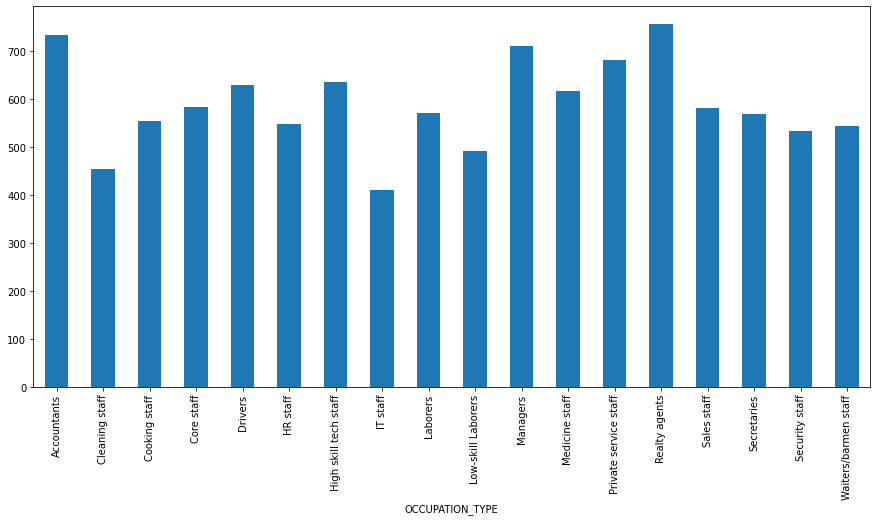

In [86]:
# Numeric value DAYS_LAST_PHONE_CHANGE comparison against Category "OCCUPATION_TYPE"

plt.figure(figsize=(15, 7))
df1_t1.groupby("OCCUPATION_TYPE")["DAYS_LAST_PHONE_CHANGE"].median().plot.bar()
plt.show()

### Observation
- It can be seen IT staff & Cleaning Staff have higher tendency to change PHONE in recent days when being a defaulter.

- ###  Subtask 3.5: Correlation Heatmap

In [87]:
# Find the correlation values of the columns and store in respective target0 and target1 dataframe
target0_corr=df1_t0.iloc[0:,2:29]
target1_corr=df1_t0.iloc[0:,2:29]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [88]:
target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.034335   -0.000687   
AMT_INCOME_TOTAL                 0.034335          1.000000    0.351743   
AMT_CREDIT                      -0.000687          0.351743    1.000000   
AMT_ANNUITY                      0.022384          0.419615    0.814102   
AMT_GOODS_PRICE                 -0.004694          0.354426    0.982669   
REGION_POPULATION_RELATIVE      -0.025448          0.065088    0.027888   
DAYS_BIRTH                      -0.378762         -0.101830    0.058153   
DAYS_EMPLOYED                   -0.213005         -0.102973    0.018404   
DAYS_REGISTRATION               -0.184949         -0.068049    0.000378   
DAYS_ID_PUBLISH                  0.014239         -0.038383    0.002935   
CNT_FAM_MEMBERS                  0.806153          0.033983    0.072500   
REGION_RATING_CLIENT             0.021825         -0.165082   -0.046239   
REGION_RATING_CLIENT_W_CITY      0.020571         -0.183255   -0.053021   
REG_REGION_NOT_LIVE_REGION      -0.011914          0.067542    0.005491   
REG_REGION_NOT_WORK_REGION       0.015360          0.143414    0.023646   
LIVE_REGION_NOT_WORK_REGION      0.021943          0.131578    0.027780   
REG_CITY_NOT_LIVE_CITY           0.028351          0.024917   -0.026506   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.022384        -0.004694   
AMT_INCOME_TOTAL                0.419615         0.354426   
AMT_CREDIT                      0.814102         0.982669   
AMT_ANNUITY                     1.000000         0.809831   
AMT_GOODS_PRICE                 0.809831         1.000000   
REGION_POPULATION_RELATIVE      0.029152         0.038147   
DAYS_BIRTH                     -0.013822         0.059617   
DAYS_EMPLOYED                  -0.033408         0.023513   
DAYS_REGISTRATION              -0.028838         0.000537   
DAYS_ID_PUBLISH                -0.017510         0.004904   
CNT_FAM_MEMBERS                 0.090439         0.072239   
REGION_RATING_CLIENT           -0.072093        -0.048806   
REGION_RATING_CLIENT_W_CITY    -0.083401        -0.054989   
REG_REGION_NOT_LIVE_REGION      0.021104         0.006697   
REG_REGION_NOT_WORK_REGION      0.053985         0.024367   
LIVE_REGION_NOT_WORK_REGION     0.053403         0.027843   
REG_CITY_NOT_LIVE_CITY         -0.003590        -0.028458   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                  -0.025448   -0.378762   
AMT_INCOME_TOTAL                               0.065088   -0.101830   
AMT_CREDIT                                     0.027888    0.058153   
AMT_ANNUITY                                    0.029152   -0.013822   
AMT_GOODS_PRICE                                0.038147    0.059617   
REGION_POPULATION_RELATIVE                     1.000000    0.032049   
DAYS_BIRTH                                     0.032049    1.000000   
DAYS_EMPLOYED                                  0.000726    0.595901   
DAYS_REGISTRATION                              0.034574    0.302451   
DAYS_ID_PUBLISH                                0.012852    0.282016   
CNT_FAM_MEMBERS                               -0.018097   -0.284718   
REGION_RATING_CLIENT                          -0.387196   -0.005305   
REGION_RATING_CLIENT_W_CITY                   -0.395352   -0.003857   
REG_REGION_NOT_LIVE_REGION                    -0.023173   -0.065531   
REG_REGION_NOT_WORK_REGION                     0.010556   -0.095971   
LIVE_REGION_NOT_WORK_REGION                    0.030513   -0.070136   
REG_CITY_NOT_LIVE_CITY                        -0.042894   -0.185010   

                             DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                     -0.213005          -0.184949   
AMT_INCOME_TOTAL                 -0.102973          -0.068049   
AMT_CREDIT                        0.018404           0.000378   
AMT_ANNUITY                      -0.0334

In [89]:
target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.034335   -0.000687   
AMT_INCOME_TOTAL                 0.034335          1.000000    0.351743   
AMT_CREDIT                      -0.000687          0.351743    1.000000   
AMT_ANNUITY                      0.022384          0.419615    0.814102   
AMT_GOODS_PRICE                 -0.004694          0.354426    0.982669   
REGION_POPULATION_RELATIVE      -0.025448          0.065088    0.027888   
DAYS_BIRTH                      -0.378762         -0.101830    0.058153   
DAYS_EMPLOYED                   -0.213005         -0.102973    0.018404   
DAYS_REGISTRATION               -0.184949         -0.068049    0.000378   
DAYS_ID_PUBLISH                  0.014239         -0.038383    0.002935   
CNT_FAM_MEMBERS                  0.806153          0.033983    0.072500   
REGION_RATING_CLIENT             0.021825         -0.165082   -0.046239   
REGION_RATING_CLIENT_W_CITY      0.020571         -0.183255   -0.053021   
REG_REGION_NOT_LIVE_REGION      -0.011914          0.067542    0.005491   
REG_REGION_NOT_WORK_REGION       0.015360          0.143414    0.023646   
LIVE_REGION_NOT_WORK_REGION      0.021943          0.131578    0.027780   
REG_CITY_NOT_LIVE_CITY           0.028351          0.024917   -0.026506   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.022384        -0.004694   
AMT_INCOME_TOTAL                0.419615         0.354426   
AMT_CREDIT                      0.814102         0.982669   
AMT_ANNUITY                     1.000000         0.809831   
AMT_GOODS_PRICE                 0.809831         1.000000   
REGION_POPULATION_RELATIVE      0.029152         0.038147   
DAYS_BIRTH                     -0.013822         0.059617   
DAYS_EMPLOYED                  -0.033408         0.023513   
DAYS_REGISTRATION              -0.028838         0.000537   
DAYS_ID_PUBLISH                -0.017510         0.004904   
CNT_FAM_MEMBERS                 0.090439         0.072239   
REGION_RATING_CLIENT           -0.072093        -0.048806   
REGION_RATING_CLIENT_W_CITY    -0.083401        -0.054989   
REG_REGION_NOT_LIVE_REGION      0.021104         0.006697   
REG_REGION_NOT_WORK_REGION      0.053985         0.024367   
LIVE_REGION_NOT_WORK_REGION     0.053403         0.027843   
REG_CITY_NOT_LIVE_CITY         -0.003590        -0.028458   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                  -0.025448   -0.378762   
AMT_INCOME_TOTAL                               0.065088   -0.101830   
AMT_CREDIT                                     0.027888    0.058153   
AMT_ANNUITY                                    0.029152   -0.013822   
AMT_GOODS_PRICE                                0.038147    0.059617   
REGION_POPULATION_RELATIVE                     1.000000    0.032049   
DAYS_BIRTH                                     0.032049    1.000000   
DAYS_EMPLOYED                                  0.000726    0.595901   
DAYS_REGISTRATION                              0.034574    0.302451   
DAYS_ID_PUBLISH                                0.012852    0.282016   
CNT_FAM_MEMBERS                               -0.018097   -0.284718   
REGION_RATING_CLIENT                          -0.387196   -0.005305   
REGION_RATING_CLIENT_W_CITY                   -0.395352   -0.003857   
REG_REGION_NOT_LIVE_REGION                    -0.023173   -0.065531   
REG_REGION_NOT_WORK_REGION                     0.010556   -0.095971   
LIVE_REGION_NOT_WORK_REGION                    0.030513   -0.070136   
REG_CITY_NOT_LIVE_CITY                        -0.042894   -0.185010   

                             DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                     -0.213005          -0.184949   
AMT_INCOME_TOTAL                 -0.102973          -0.068049   
AMT_CREDIT                        0.018404           0.000378   
AMT_ANNUITY                      -0.0334

In [90]:
# Define function for plotting heatmap based on the produced correlation tables(target0 and target1)
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    sns.heatmap(data, cmap="Greens",annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

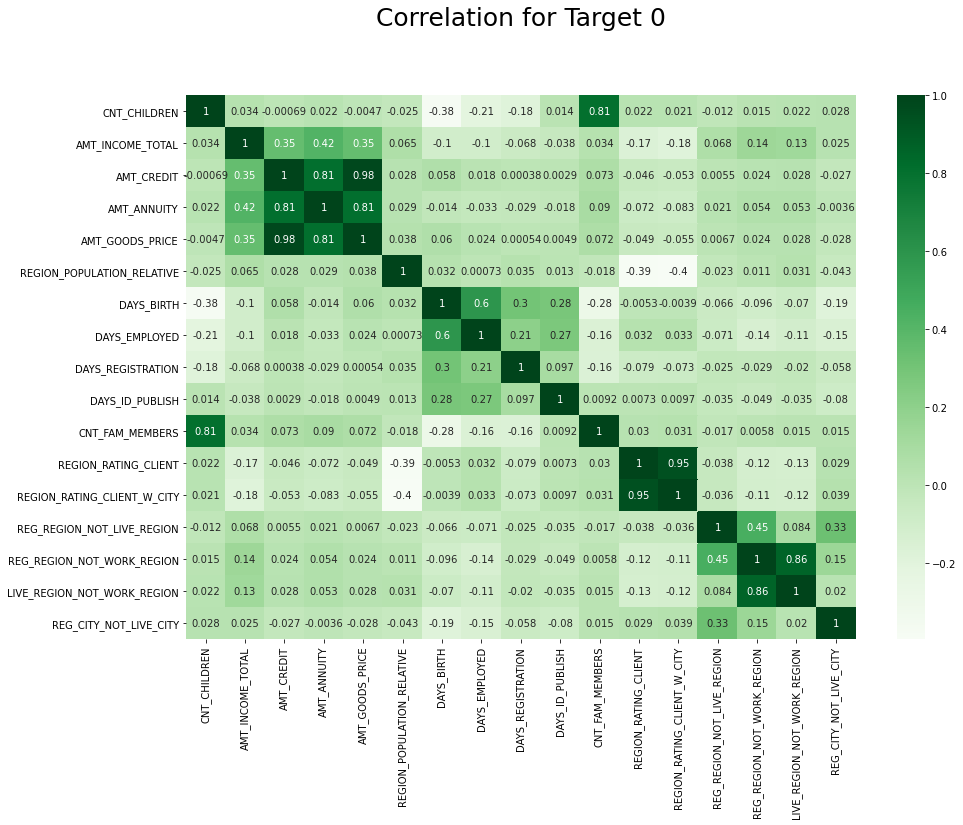

In [91]:
# Heat map for Target 0 showing correlations between all the variables
targets_corr(data=target0,title='Correlation for Target 0')

### Observations:

1. Credit amount is highly correlated with GoodsPrice as it means Credit amount is directly proportional with Goods Price.
2. Credit amount is also highly correlated with Annuity Amount as it means Credit amount is directly proportional with Annuity Amount.
3. Goods Price is also highly correlated with Annuity Amount as it means Goods Price is directly proportional with Annuity Amount.
4. Income amount is also highly correlated with Annuity Amount as it means Income amount is directly proportional with Annuity Amount.


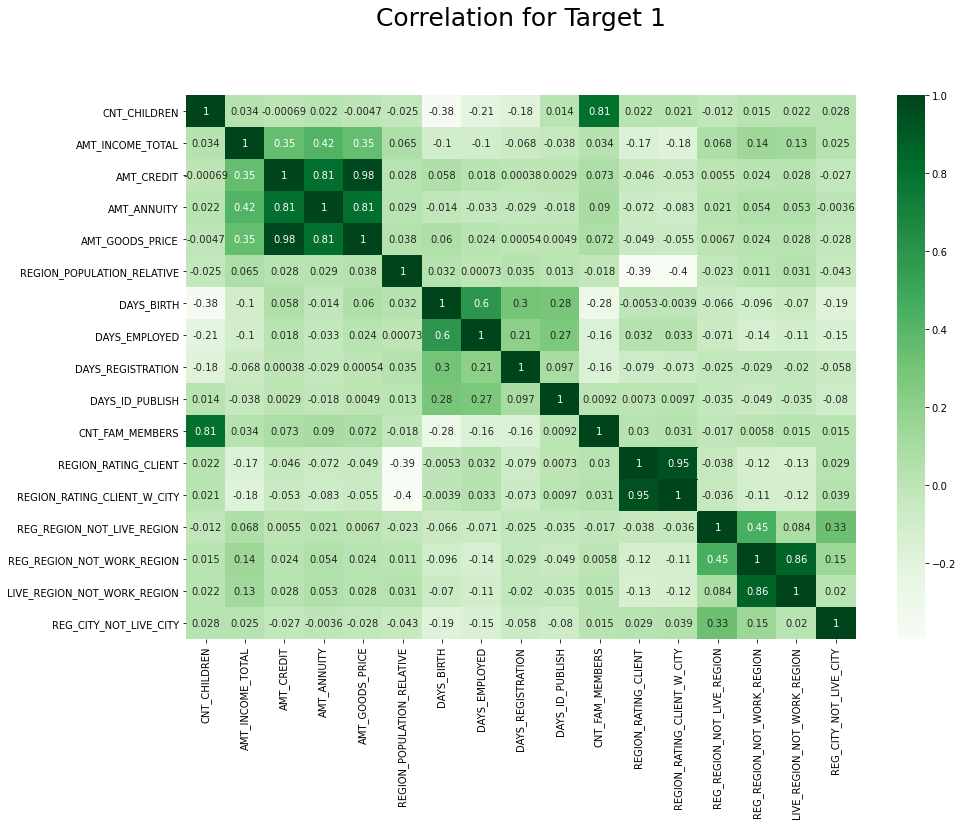

In [92]:
# Heat map for Target 1 showing correlations between all the variables
targets_corr(data=target1,title='Correlation for Target 1')

### Observations:

1. Credit amount is highly correlated with GoodsPrice as it means Credit amount is directly proportional with Goods Price.
2. Credit amount is also highly correlated with Annuity Amount as it means Credit amount is directly proportional with Annuity Amount.
3. Goods Price is also highly correlated with Annuity Amount as it means Goods Price is directly proportional with Annuity Amount.
4. Income amount is also highly correlated with Annuity Amount as it means Income amount is directly proportional with Annuity Amount.

##  Task 4: Reading the Previous application data

- ### Subtask 4.1: Reading previous Application Data.

In [93]:
# Reading the previous application data file provided and store it in a dataframe `df_prev_data`.

df_prev_data = pd.read_csv('previous_application.csv')

# Set option to display all the rows and colums without limit
pd.set_option('display.max_columns', None, 'display.max_rows', None)
df_prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

- ###  Subtask 4.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [94]:
# Checking the number of rows and columns in the dataframe
df_prev_data.shape

(1670214, 37)

In [95]:
# Check the summary for the columns
df_prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [96]:
# Check the column-wise null counts in the dataframe
df_prev_data.isnull().sum() 

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## Task 5: Cleaning the Data

Now that we have loaded the dataset and inspected it, we will do the data cleansing. 

- ###  Subtask 5.1: Drop unnecessary columns

Drop columns that are not required for our analysis.

In [97]:
# Creating copy of original data frame 
df2 = df_prev_data

In [98]:
# Removing the columns which has null values more than 50%

nullcols=df2.isnull().sum()
nullcols=nullcols[nullcols.values>(0.5*len(nullcols))]
nullcols = list(nullcols[nullcols.values>=0.5].index)
df2.drop(labels=nullcols,axis=1,inplace=True)

In [99]:
# Check again the column-wise null counts in the dataframe
df2.isnull().sum() 

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

- ###  Subtask 5.2: Detecting Outliers

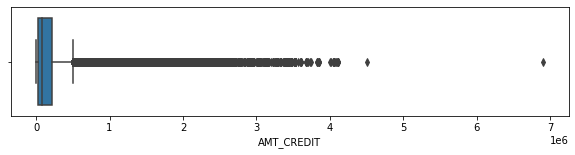

In [100]:
# Checking the outliers for AMT_CREDIT column
plt.figure(figsize=(10,2))
sns.boxplot(df2.AMT_CREDIT)
plt.show()

### Observations:

There are many outliers in the AMT_CREDIT column.

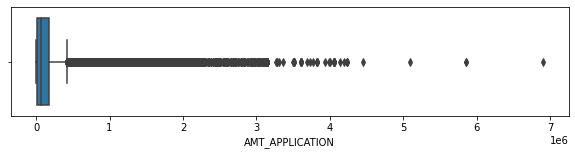

In [101]:
# Checking the outliers for AMT_APPLICATION column
plt.figure(figsize=(10,2))
sns.boxplot(df2.AMT_APPLICATION)
plt.show()

### Observations:

There are many outliers in the AMT_APPLICATION column.

## Task 6: Data Analysis for Previous application data

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

- ### Subtask 6.1 Univariate Analysis

In [102]:
# Define the function for plotting univariate countplot graphs
def plotUnivariatePrev(column):
    plt.figure(figsize=(15,7))           
    sns.countplot(column, data=df2)
    plt.title('Previous Application', fontsize=20) 
    plt.show()

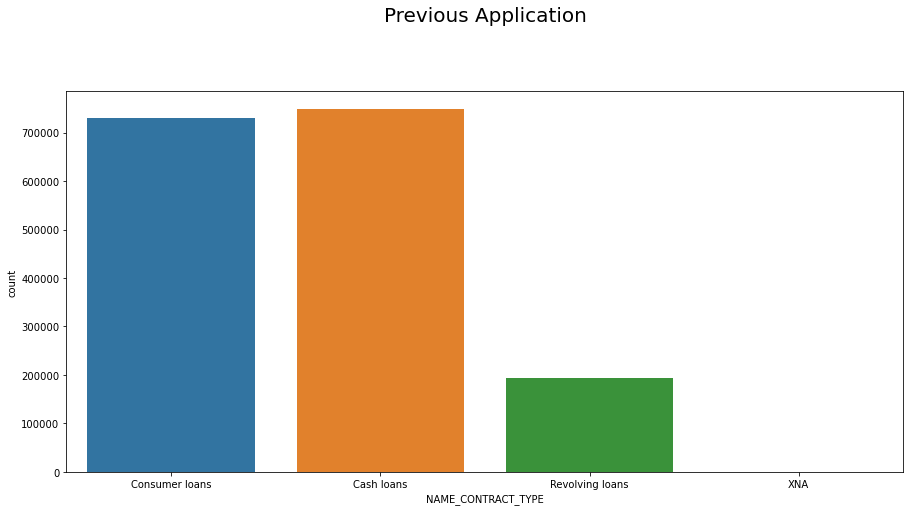

In [103]:
# Plot countplot for NAME_CONTRACT_TYPE column
plotUnivariatePrev('NAME_CONTRACT_TYPE')

### Observations:
1. People have opted the most for cash loan followed by consumer loans.
2. Revolving loans are the least taken contract type.

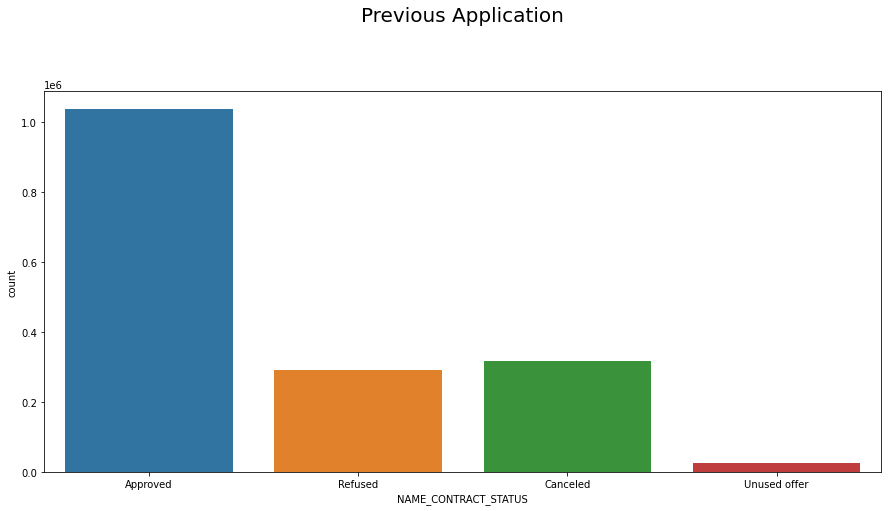

In [104]:
# Plot countplot for NAME_CONTRACT_STATUS column
plotUnivariatePrev('NAME_CONTRACT_STATUS')

### Observations:
1. The dataframe contains the most number of approved loans.
2. Least is the unused offer.

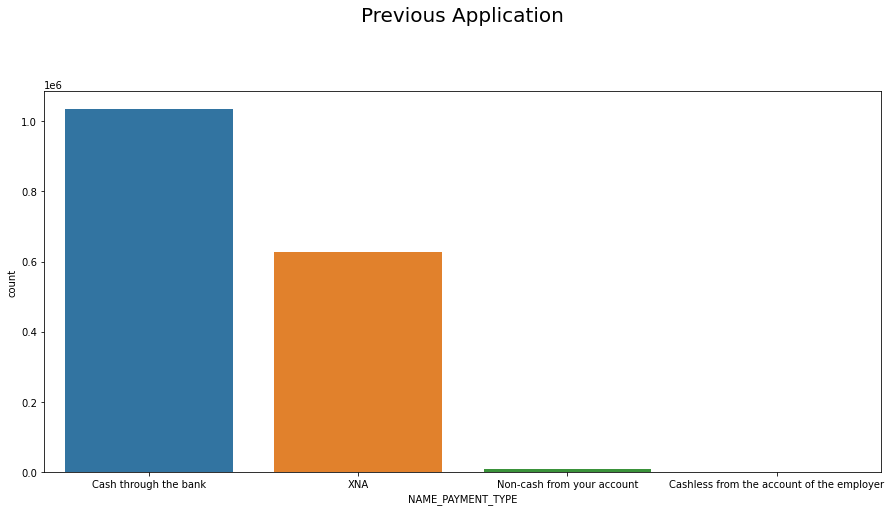

In [105]:
# Plot countplot for NAME_PAYMENT_TYPE column
plotUnivariatePrev('NAME_PAYMENT_TYPE')

### Observations:
1. The most popular payment type choosed is cash through the bank.

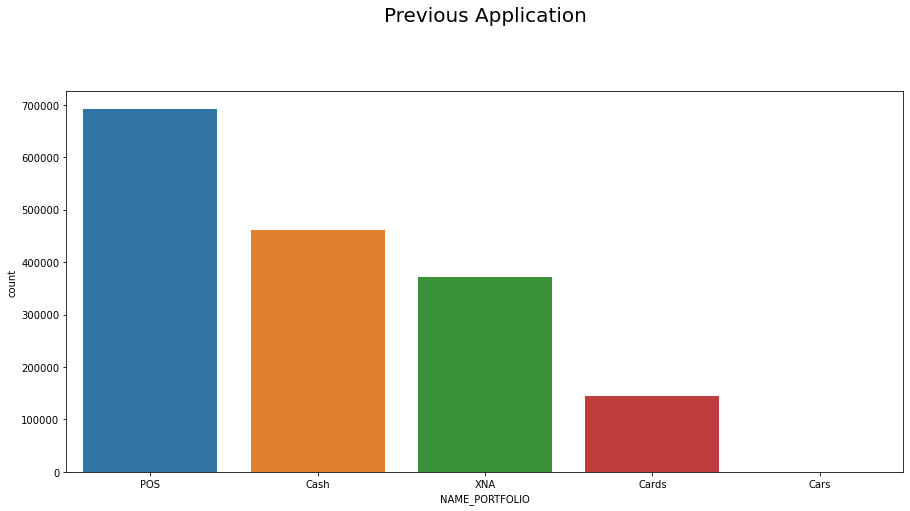

In [106]:
# Plot countplot for NAME_PORTFOLIO column
plotUnivariatePrev('NAME_PORTFOLIO')

### Observations:
1. Most number of applications are for POS(Point of sale) purpose followed by cash.
2. Cars is the least popular portfolio in this dataframe.


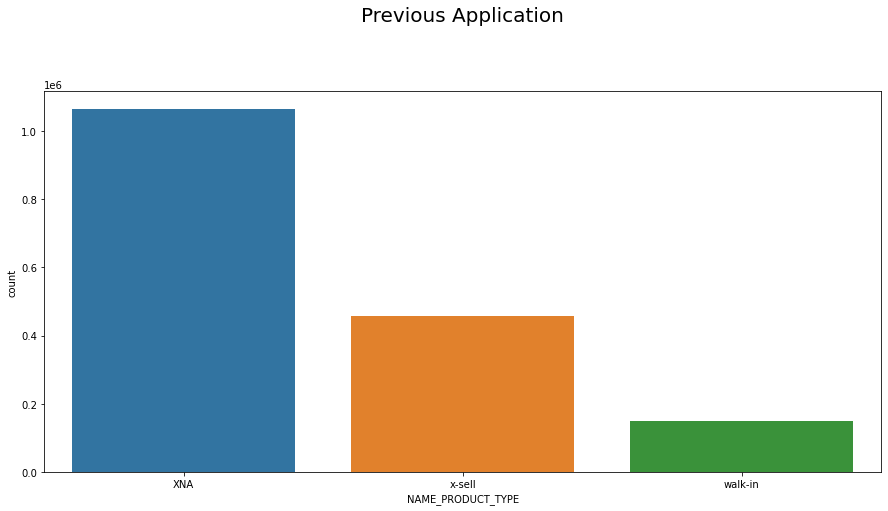

In [107]:
# Plot countplot for NAME_PRODUCT_TYPE column
plotUnivariatePrev('NAME_PRODUCT_TYPE')

### Observations:

1. There is a major unknown data in this column.
2. Among x-sell and walk-in, majority number of people have their product type as x-sell.

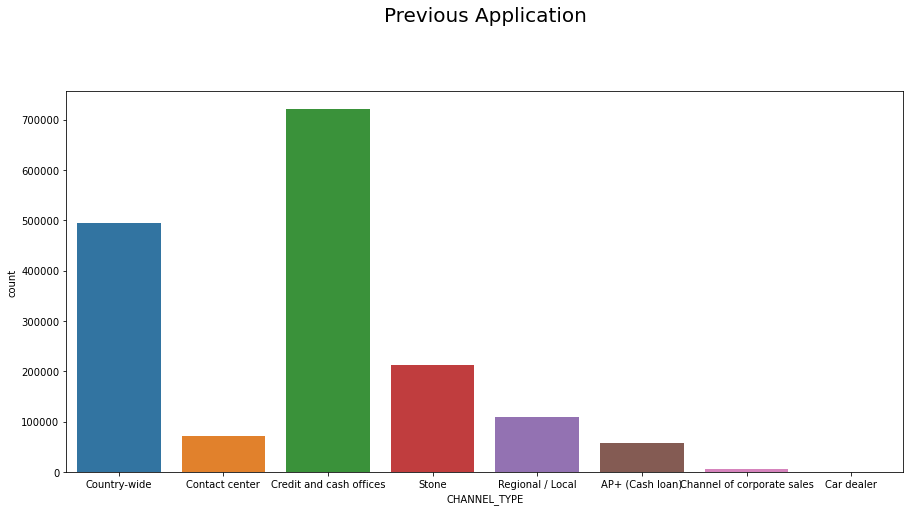

In [108]:
# Plot countplot for CHANNEL_TYPE column
plotUnivariatePrev('CHANNEL_TYPE')

### Observations:
1. Most number of clients are acquired through credit and cash offices followed by country-wise.
2. Car dealers and channel of corporate sales is the least preferred channel type.

- ### Subtask 6.2 Bivariate Analysis

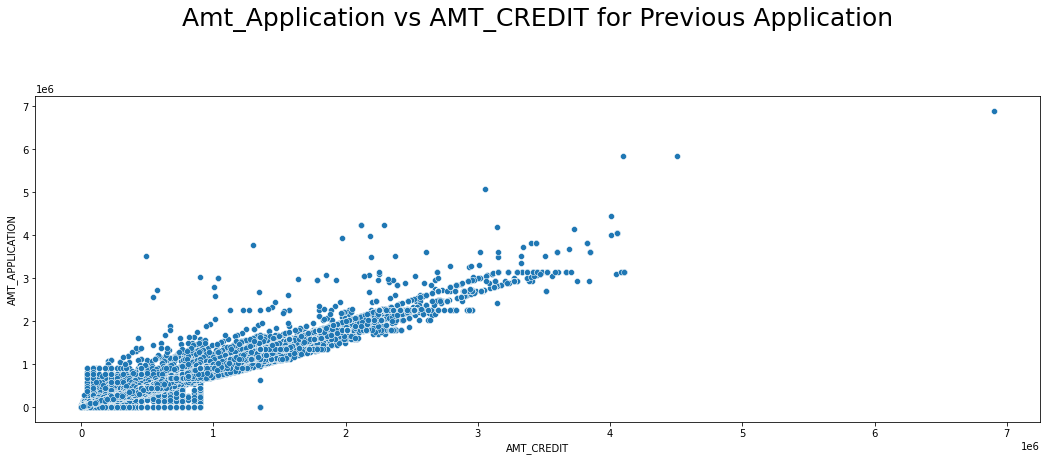

In [109]:
# Plot scatterplot for AMT_CREDIT vs AMT_APPLICATION columns
plt.figure(figsize=(18,6))
sns.scatterplot(x='AMT_CREDIT',y='AMT_APPLICATION',data=df2)
plt.title('Amt_Application vs AMT_CREDIT for Previous Application')
plt.show()

### Observations:
1. The graph is densely populated between 1000000 application amount and 1000000 credit amount.
2. We can also see that the application amount and credit amount has a positive correlation.

## Task 7: Merging Loan Application data & Previous Loan application data 

In [110]:
# Merge the application data and previous application data dataframes to analyse it further
Merged = df1.merge(df2,on='SK_ID_CURR',how='inner')
Merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               N             0          270000.0     1293502.5      35698.5   
3               N             0          270000.0     1293502.5      35698.5   
4               Y             0           67500.0      135000.0       6750.0   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2        1129500.0    State servant               Higher education   
3        1129500.0    State servant               Higher education   
4         135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0      9461.0          637.0             3648.0           2120.0   
1     16765.0         1188.0             1186.0            291.0   
2     16765.0         1188.0             1186.0            291.0   
3     16765.0         1188.0             1186.0            291.0   
4     19046.0          225.0             4260.0           2531.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            1                       MONDAY   
3                            1                       MONDAY   
4                            2                       MONDAY   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0  

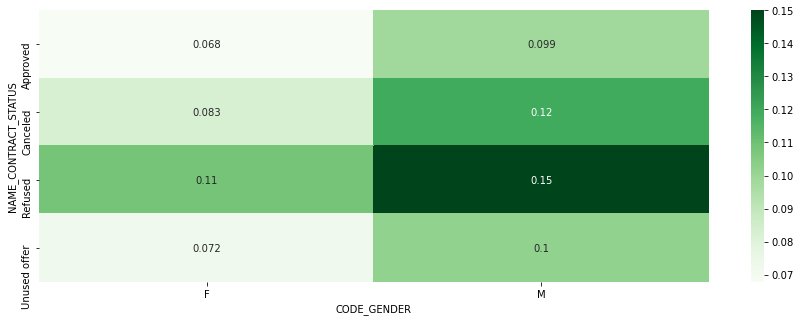

In [111]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs CODE_GENDER column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["CODE_GENDER"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Male clients with Contract Status "Refused" are more likely to be defaulters.
2. In general, Male clients are more likely to be defaulters.


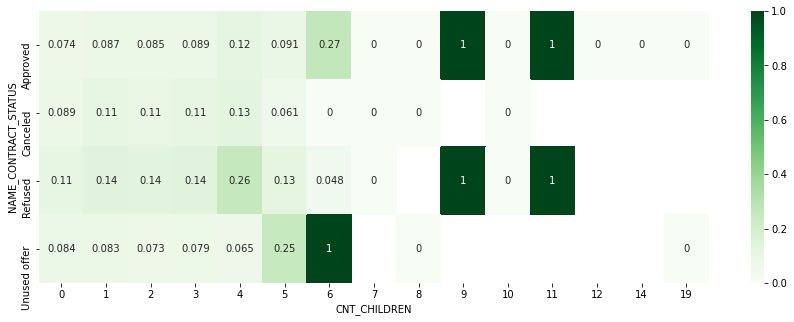

In [112]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs CNT_CHILDREN column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["CNT_CHILDREN"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations: 
1. Client with more number of children are more likely to be defaulters irrespective of the Contract Status.
2. Clients with 9 and 11 children are 100% likely to Default.
3. Clients with 6 Children and Contract Status "Unused Offer" are 100% likely to default.

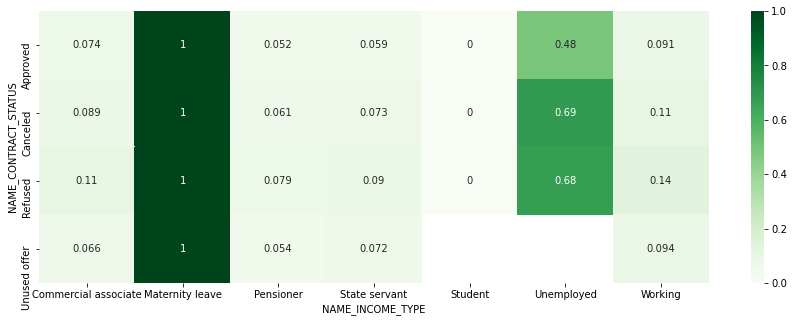

In [113]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_INCOME_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_INCOME_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Client who are in Maternity Leave are 100% likely to Default irrespective of the Contract Status.
2. Clients who are Unemployed with Contract Status "Refused" or "Cancelled" are more likely to Default.
3. Student are less likely to Default in general.

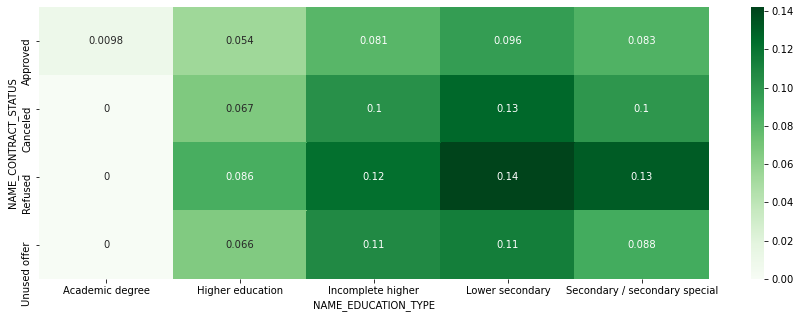

In [114]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_EDUCATION_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Client with incomplete Higher and Secondary /Secondary Special Education Type with "Refused" Contract Status are more likely to Default , Where as Clients with Education Type Lower Secondary are most Likely to Default.
2. Clients with Lower Secondary Education type has more defaulters compared to other Education Type.
3. Clients holding Academic Degree are less likely to default irrespective of Contract Status.

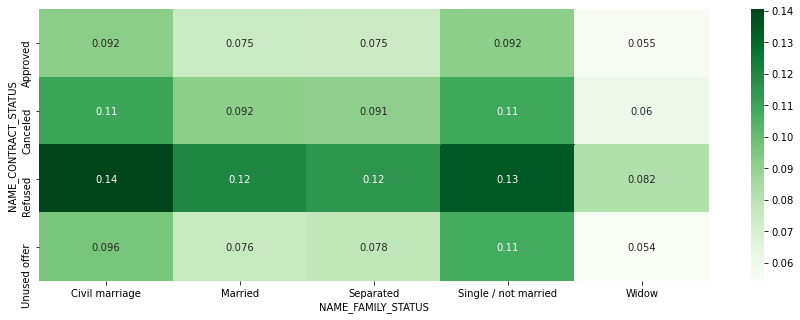

In [115]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_FAMILY_STATUS column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_FAMILY_STATUS"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Clients with Contract Status "Refused" have more Defaulters for all the Family Status except "Widows" . Clients With Civil Marriage being the highest.
2. Clients who are Widows are less likely to default irrespective of the Contract Status.
3. Clients who are Single/Not Married or Civil Marriage are more likely to default for Contract Status "Cancelled".
4. Clients who are Single/Not Married are more likely to default for Contract Status "Unused Offer".

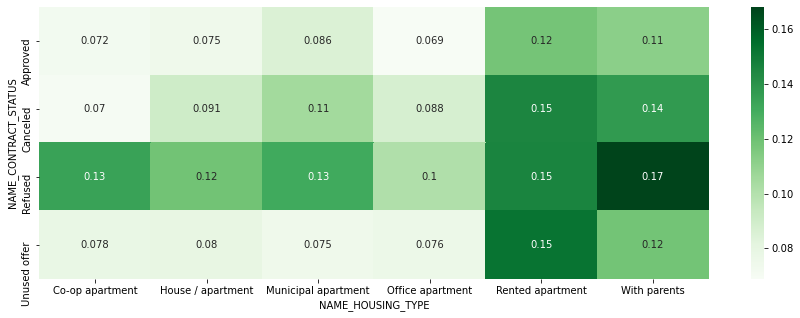

In [116]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_HOUSING_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_HOUSING_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Clients with Parents and Contract Status "Refused" have more Defaulters.
2. Clients with Rented Apartment with Contract Status "Unused Offer", "Refused",
and "Cancelled" have more defaulters compared to "Approved".


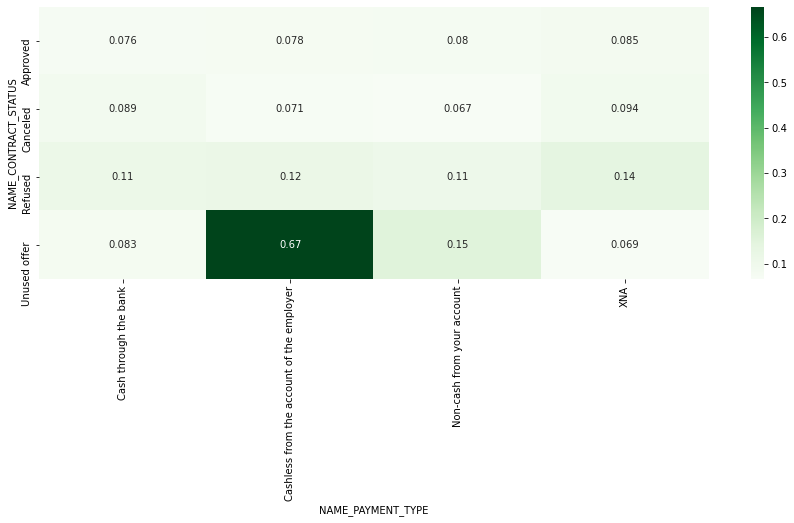

In [117]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_PAYMENT_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_PAYMENT_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Clients who have "Cashless from the account of the employer" payment type Contract Status "Unused Offer" have more Defaulters.


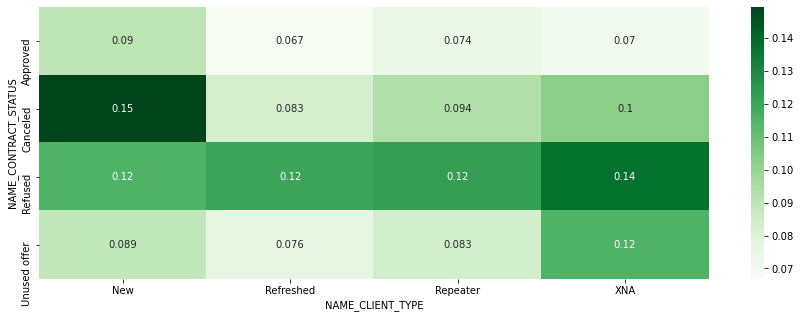

In [118]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_CLIENT_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Clients who are new with Contract Status "Cancelled" have more Defaulters.
2. Clients with Contract Status "Refused" have more Defaulters irrespective of the Client Type.

In [119]:
# Merge the application data and previous application data dataframes to analyse it further
Merged = df1.merge(df2,on='SK_ID_CURR',how='inner')
Merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0          202500.0      406597.5      24700.5   
1               N             0          270000.0     1293502.5      35698.5   
2               N             0          270000.0     1293502.5      35698.5   
3               N             0          270000.0     1293502.5      35698.5   
4               Y             0           67500.0      135000.0       6750.0   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2        1129500.0    State servant               Higher education   
3        1129500.0    State servant               Higher education   
4         135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0      9461.0          637.0             3648.0           2120.0   
1     16765.0         1188.0             1186.0            291.0   
2     16765.0         1188.0             1186.0            291.0   
3     16765.0         1188.0             1186.0            291.0   
4     19046.0          225.0             4260.0           2531.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            1                       MONDAY   
3                            1                       MONDAY   
4                            2                       MONDAY   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0  

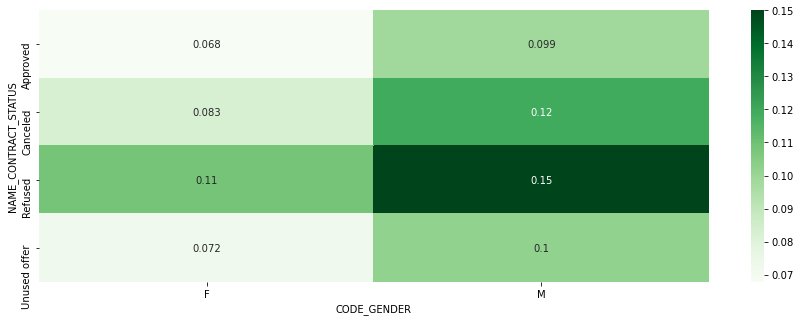

In [120]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs CODE_GENDER column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["CODE_GENDER"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Male clients with Contract Status "Refused" are more likely to be defaulters.
2. In general, Male clients are more likely to be defaulters.


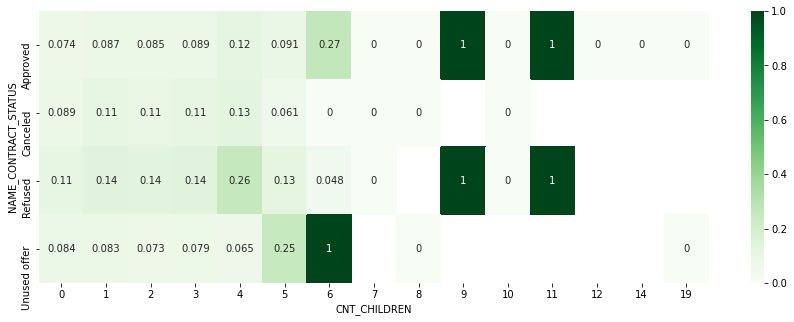

In [121]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs CNT_CHILDREN column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["CNT_CHILDREN"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations: 
1. Client with more number of children are more likely to be defaulters irrespective of the Contract Status.
2. Clients with 9 and 11 children are 100% likely to Default.
3. Clients with 6 Children and Contract Status "Unused Offer" are 100% likely to default.

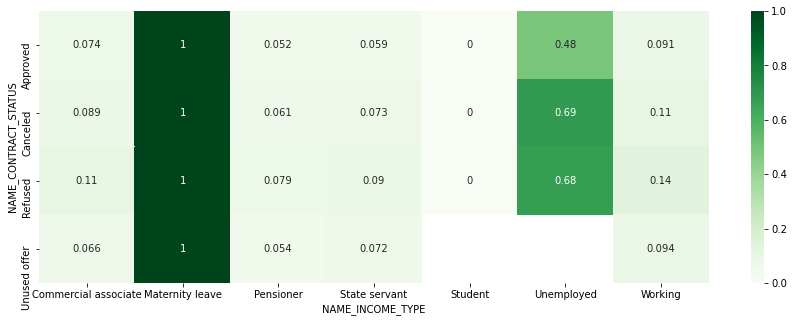

In [122]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_INCOME_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_INCOME_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Client who are in Maternity Leave are 100% likely to Default irrespective of the Contract Status.
2. Clients who are Unemployed with Contract Status "Refused" or "Cancelled" are more likely to Default.
3. Student are less likely to Default in general.

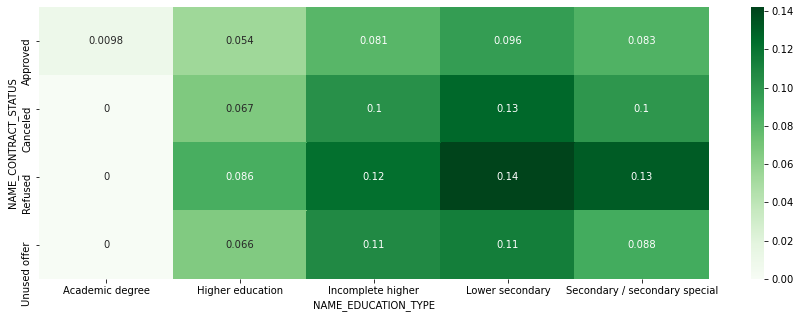

In [123]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_EDUCATION_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Client with incomplete Higher and Secondary /Secondary Special Education Type with "Refused" Contract Status are more likely to Default , Where as Clients with Education Type Lower Secondary are most Likely to Default.
2. Clients with Lower Secondary Education type has more defaulters compared to other Education Type.
3. Clients holding Academic Degree are less likely to default irrespective of Contract Status.

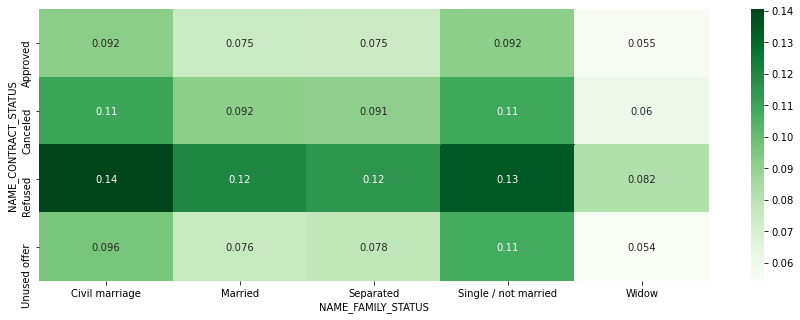

In [124]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_FAMILY_STATUS column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_FAMILY_STATUS"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Clients with Contract Status "Refused" have more Defaulters for all the Family Status except "Widows" . Clients With Civil Marriage being the highest.
2. Clients who are Widows are less likely to default irrespective of the Contract Status.
3. Clients who are Single/Not Married or Civil Marriage are more likely to default for Contract Status "Cancelled".
4. Clients who are Single/Not Married are more likely to default for Contract Status "Unused Offer".

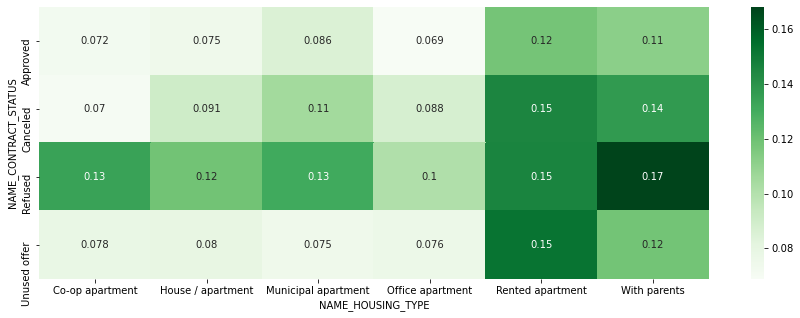

In [125]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_HOUSING_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_HOUSING_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:
1. Clients with Parents and Contract Status "Refused" have more Defaulters.
2. Clients with Rented Apartment with Contract Status "Unused Offer", "Refused",
and "Cancelled" have more defaulters compared to "Approved".


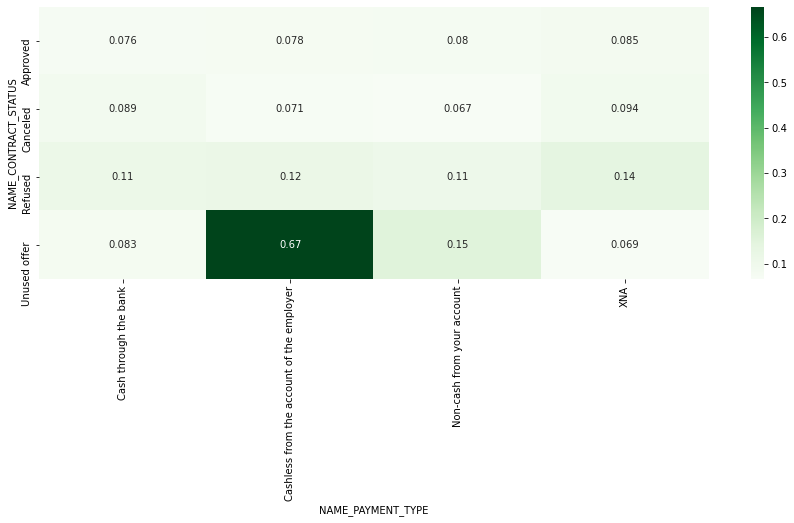

In [126]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_PAYMENT_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_PAYMENT_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Clients who have "Cashless from the account of the employer" payment type Contract Status "Unused Offer" have more Defaulters.


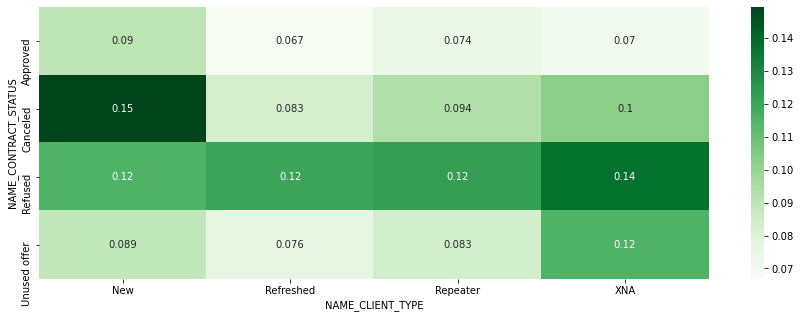

In [127]:
plt.figure(figsize=[15,5])
# Create a pivot table for calculating average of TARGET column for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE column.
piv = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_CLIENT_TYPE"])
# Plot a heatmap based on the pivot table
sns.heatmap(data=piv,cmap="Greens",annot=True)
plt.show()

### Observations:

1. Clients who are new with Contract Status "Cancelled" have more Defaulters.
2. Clients with Contract Status "Refused" have more Defaulters irrespective of the Client Type.

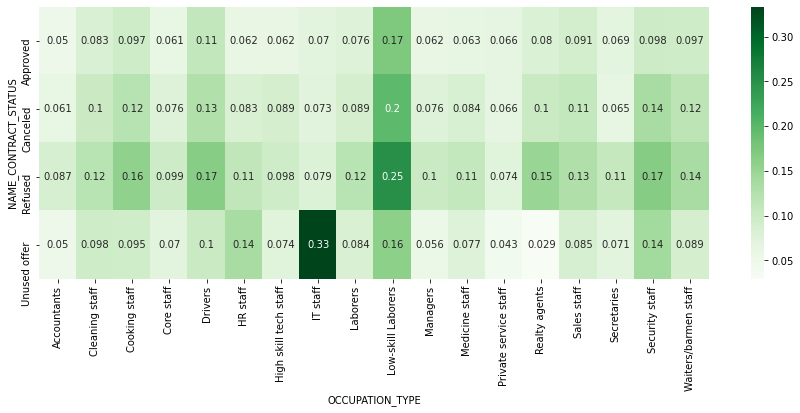

In [128]:
#finding corrleation between NAME_CONTRACT_STATUS & OCCUPATION_TYPE

plt.figure(figsize=[15,5])
table = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["OCCUPATION_TYPE"])
sns.heatmap(data=table,cmap="Greens",annot=True)
plt.show()

### Observations:

 - Low skilled laborers & IT Staff have more probability of being a defaulter

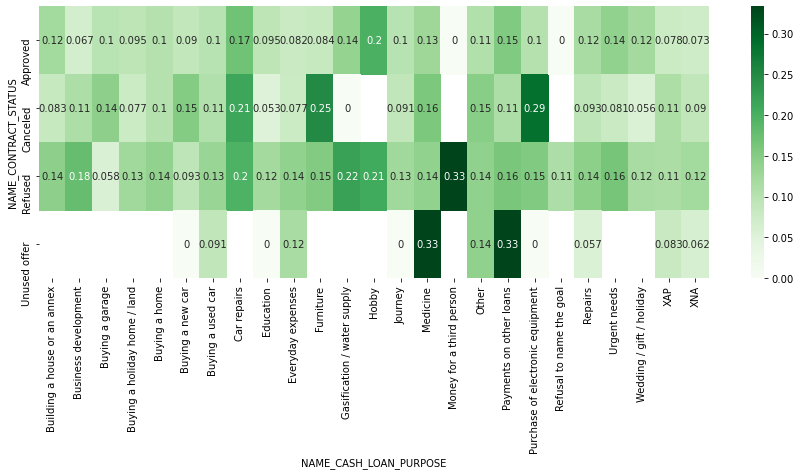

In [129]:
#finding corrleation between NAME_CONTRACT_STATUS & NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=[15,5])
table = pd.pivot_table(data=Merged, index="NAME_CONTRACT_STATUS", values="TARGET",columns=["NAME_CASH_LOAN_PURPOSE"])
sns.heatmap(data=table,cmap="Greens",annot=True)
plt.show()

### Observations:

 - Cash loan of with purpose of 'Money for third person', 'Refusal to name the goal' have more probability of being a defaulter

# Conclusion

Thus, analysing both the loan application data and previous loan application data, we can conclude as follows:

Most preferred clients:

1. We can approach more to the students and businessman as they are less likely to default.
2. In terms of education we can prefer clients with academic degree over others as they are less likely to default.
3. Clients living in Co-Op housing appartments or living in their own house can be preferred as they are less likely to be a defaulter.
4. Clients whose previous application were approved are more preferable as they are less likely to default.



Less preferred clients:
1. Clients who have been refused for the loan before are more likely to be defaulters.
2. Clients with relatively more number of children are more likely to be defaulters.
3. Females on maternity leave are more likely to default.
4. Unemployed clients are more likely to be defaulters.
5. Clients with lower secondary/secondary education can be avoided as they are more likely to default.
6. Clients living in rented appartments are more likely to default followed by clients living with parents.
7. It can be inferred that the male clients are more likely to be defaulters.
8. Client of occuptaion type 'Low skilled laborers' & 'IT Staff' have more probability of being a defaulter
